# Notebook of Feature Selection of important phenotypes covariables for IBD patients

## Packages

In [2]:
import subprocess

def instalar_paquetes():
    paquetes = [
        "appnope==0.1.4",
        "asttokens==3.0.0",
        "cloudpickle==3.1.1",
        "comm==0.2.2",
        "contourpy==1.3.2",
        "cycler==0.12.1",
        "debugpy==1.8.14",
        "decorator==5.2.1",
        "executing==2.2.0",
        "fonttools==4.57.0",
        "ipykernel==6.29.5",
        "ipython==9.2.0",
        "ipython_pygments_lexers==1.1.1",
        "jedi==0.19.2",
        "joblib==1.5.0",
        "jupyter_client==8.6.3",
        "jupyter_core==5.7.2",
        "kiwisolver==1.4.8",
        "llvmlite==0.44.0",
        "matplotlib==3.10.1",
        "matplotlib-inline==0.1.7",
        "nest-asyncio==1.6.0",
        "numba==0.61.2",
        "numpy==2.2.5",
        "packaging==25.0",
        "pandas==2.2.3",
        "parso==0.8.4",
        "pexpect==4.9.0",
        "pillow==11.2.1",
        "platformdirs==4.3.7",
        "prompt_toolkit==3.0.51",
        "psutil==7.0.0",
        "ptyprocess==0.7.0",
        "pure_eval==0.2.3",
        "Pygments==2.19.1",
        "pyparsing==3.2.3",
        "python-dateutil==2.9.0.post0",
        "pytz==2025.2",
        "pyzmq==26.4.0",
        "scikit-learn==1.6.1",
        "scipy==1.15.3",
        "seaborn==0.13.2",
        "shap==0.47.2",
        "six==1.17.0",
        "slicer==0.0.8",
        "stack-data==0.6.3",
        "threadpoolctl==3.6.0",
        "tornado==6.4.2",
        "tqdm==4.67.1",
        "traitlets==5.14.3",
        "typing_extensions==4.14.0",
        "tzdata==2025.2",
        "wcwidth==0.2.13",
        "xgboost==3.0.2"
    ]
    
    for paquete in paquetes:
        subprocess.run(["pip", "install", paquete])

# Ejecuta esta función
#instalar_paquetes()



In [3]:
# Import the required libraries for data analysis and visualization
import pandas as pd # Para manejar dataframes
import numpy as np # Para operaciones matemáticas
import os # Para manejar rutas
import matplotlib.pyplot as plt # Para graficar
import seaborn as sns # Para graficar
import re # Para quitar el patron '_0_0'
from sklearn.experimental import enable_iterative_imputer  # IterativeImputer
from sklearn.impute import IterativeImputer # IterativeImputer
from scipy import stats # Para outliers
import shap # Para SHAP
from sklearn.model_selection import train_test_split # Para dividir el conjunto de datos
from sklearn.ensemble import RandomForestClassifier # Para Random Forest
from sklearn.metrics import classification_report # Para evaluar
from sklearn.preprocessing import LabelEncoder # Para pasar variables categoricas a numericas
import xgboost as xgb # XGboost for classification
import openpyxl


/Users/fjosesala/Documents/GitHub/Olink_Plexus/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Set paths

In [4]:
# Set the paths
path = "/Users/fjosesala/Documents/GitHub/Olink_Plexus/Plexus_UCvsCD/1.Datos_Raw"
path_outputs = "/Users/fjosesala/Documents/GitHub/Olink_Plexus/Plexus_UCvsCD/Output"

## Charge data

In [305]:
#Charge the dataframes

# Plexus Metadata
plexus_metadata = pd.read_excel(os.path.join(path,"Metadata_plexus.xlsx"))
plexus_metadata

,INVESTIGATION_TITLE,IBD_PLEXUS_DATA_RELEASE_DATE,INVESTIGATION_DISEASE,INVESTIGATION_DESCRIPTION,INVESTIGATION_CONT_LAST_NAME,INVESTIGATION_CONT_FIRST_NAME,INVESTIGATION_CONT_EMAIL,INVESTIGATION_CONT_INST/ORG,STUDY_TITLE,STUDY_DISEASE,...,RNASEQ_60,WHOLE_SHOTGUN_SEQUENCING_WGS_60,ITS2_SEQUENCING_60,VIRAL_METAGENOMICS_SEQUENCING_VIROME_60,PROTEOMIC_BIOMARKER_PANELS_OLINK_60,BMI,BMI_DATE,DISEASE_LOCATION,UPPERGI,PERIANAL
0,SPARC IBD plasma proteomic data generation,01-JUN-2022,IBD,Generation of proteomic data from Olink Explor...,Dobes,Angela,adobes@crohnscolitisfoundation.org,Crohn's and Colitis Foundation,SPARC IBD plasma proteomic data generation,IBD,...,NaN,1.0,1.0,NaN,1,25.679102,2017-07-13,NaN,NaN,Unknown
1,SPARC IBD plasma proteomic data generation,01-JUN-2022,IBD,Generation of proteomic data from Olink Explor...,Dobes,Angela,adobes@crohnscolitisfoundation.org,Crohn's and Colitis Foundation,SPARC IBD plasma proteomic data generation,IBD,...,NaN,NaN,NaN,NaN,1,NaN,NaT,Ileocolonic,Unknown,Unknown
2,SPARC IBD plasma proteomic data generation,01-JUN-2022,IBD,Generation of proteomic data from Olink Explor...,Dobes,Angela,adobes@crohnscolitisfoundation.org,Crohn's and Colitis Foundation,SPARC IBD plasma proteomic data generation,IBD,...,NaN,NaN,NaN,NaN,1,NaN,NaT,Ileocolonic,No,Unknown
3,SPARC IBD plasma proteomic data generation,01-JUN-2022,IBD,Generation of proteomic data from Olink Explor...,Dobes,Angela,adobes@crohnscolitisfoundation.org,Crohn's and Colitis Foundation,SPARC IBD plasma proteomic data generation,IBD,...,1.0,NaN,NaN,NaN,1,NaN,NaT,Ileocolonic,No,Unknown
4,SPARC IBD plasma proteomic data generation,01-JUN-2022,IBD,Generation of proteomic data from Olink Explor...,Dobes,Angela,adobes@crohnscolitisfoundation.org,Crohn's and Colitis Foundation,SPARC IBD plasma proteomic data generation,IBD,...,1.0,1.0,1.0,NaN,1,23.147886,2019-08-07,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,SPARC IBD plasma proteomic data generation,01-JUN-2022,IBD,Generation of proteomic data from Olink Explor...,Dobes,Angela,adobes@crohnscolitisfoundation.org,Crohn's and Colitis Foundation,SPARC IBD plasma proteomic data generation,IBD,...,NaN,NaN,NaN,NaN,1,NaN,NaT,Ileal,No,No
2246,SPARC IBD plasma proteomic data generation,01-JUN-2022,IBD,Generation of proteomic data from Olink Explor...,Dobes,Angela,adobes@crohnscolitisfoundation.org,Crohn's and Colitis Foundation,SPARC IBD plasma proteomic data generation,IBD,...,NaN,NaN,NaN,NaN,1,NaN,NaT,NaN,NaN,NaN
2247,SPARC IBD plasma proteomic data generation,01-JUN-2022,IBD,Generation of proteomic data from Olink Explor...,Dobes,Angela,adobes@crohnscolitisfoundation.org,Crohn's and Colitis Foundation,SPARC IBD plasma proteomic data generation,IBD,...,NaN,NaN,NaN,NaN,1,NaN,NaT,Ileal,No,No
2248,SPARC IBD plasma proteomic data generation,01-JUN-2022,IBD,Generation of proteomic data from Olink Explor...,Dobes,Angela,adobes@crohnscolitisfoundation.org,Crohn's and Colitis Foundation,SPARC IBD plasma proteomic data generation,IBD,...,1.0,1.0,1.0,NaN,1,27.141737,2020-08-06,Ileocolonic,NaN,No


## Limpieza

### Eliminar NAs

In [306]:
# Drop columnas con mas de 50% de NA
threshold = 0.5 * len(plexus_metadata)
plexus_metadata = plexus_metadata.dropna(thresh=threshold, axis=1)

#Elimina columnas con solo un valor unico 
plexus_metadata = plexus_metadata.loc[:, plexus_metadata.nunique() > 1]

#eliminar nas de la columna DISEASE_LOCATION


plexus_metadata= plexus_metadata[plexus_metadata['DISEASE_LOCATION'].notna()]
plexus_metadata


,SAMPLE_COLLECTED_DATE,RAW_DATA_FILE_NAME,REQUESTED_FILE_NAME,INDEX_DATE,DATA_NUMBER,DATE_OF_CONSENT,DATE_OF_CONSENT_1,BIRTH_YEAR,SEX,DIAGNOSIS,...,SCDAI_SOURCE,SCDAI_CATEGORY,PGA,PGA_DATE,DISEASE_ACTIVITY_60,BMI,BMI_DATE,DISEASE_LOCATION,UPPERGI,PERIANAL
1,2021-10-17,FR23841213,FR23841213,2021-10-17,1,2021-10-17,2021-10-17,1965,Female,Crohn's Disease,...,SF,Moderate,Moderate,2021-10-17,Moderate,NaN,NaT,Ileocolonic,Unknown,Unknown
2,2019-02-20,FR17213021,FR17213021,2019-02-20,1,2019-02-20,2019-02-20,1955,Female,Crohn's Disease,...,SF,Remission,Quiescent,2019-02-20,Remission,NaN,NaT,Ileocolonic,No,Unknown
3,2021-04-21,FR23829990,FR23829990,2021-04-21,2,2019-02-20,2019-02-20,1955,Female,Crohn's Disease,...,ECRF,Moderate,Moderate,2021-05-04,Moderate,NaN,NaT,Ileocolonic,No,Unknown
7,2019-07-03,FR21143001,FR21143001,2019-07-03,1,2019-06-20,2019-06-20,1956,Male,Crohn's Disease,...,ECRF,Mild,Mild,2019-06-20,Mild,29.025056,2019-07-03,Ileocolonic,No,Yes
8,2019-07-27,FR20599437,FR20599437,2019-07-27,1,2019-07-27,2019-07-27,1984,Female,Crohn's Disease,...,SF,Moderate,Mild,2019-07-27,Moderate,23.117073,2019-07-27,Ileocolonic,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,2021-11-19,FR24888013,FR24888013,2021-11-19,1,2021-11-19,2021-11-19,1970,Female,Crohn's Disease,...,SF,Mild,Severe,2021-11-19,Mild,NaN,NaT,Colonic,NaN,Unknown
2245,2021-11-21,FR27851455,FR27851455,2021-11-21,1,2021-11-21,2021-11-21,1996,Male,Crohn's Disease,...,ECRF,Remission,Mild,2021-12-04,Remission,NaN,NaT,Ileal,No,No
2247,2021-12-04,FR24484087,FR24484087,2021-12-04,1,2021-12-04,2021-12-04,1994,Female,Crohn's Disease,...,SF,Moderate,Mild,2021-12-04,Moderate,NaN,NaT,Ileal,No,No
2248,2020-07-15,FR21153371,FR21153371,2020-07-15,2,2019-09-20,2019-09-20,1956,Male,Crohn's Disease,...,ECRF,Remission,Quiescent,2020-08-13,Remission,27.141737,2020-08-06,Ileocolonic,NaN,No


In [307]:
plexus_metadata

,SAMPLE_COLLECTED_DATE,RAW_DATA_FILE_NAME,REQUESTED_FILE_NAME,INDEX_DATE,DATA_NUMBER,DATE_OF_CONSENT,DATE_OF_CONSENT_1,BIRTH_YEAR,SEX,DIAGNOSIS,...,SCDAI_SOURCE,SCDAI_CATEGORY,PGA,PGA_DATE,DISEASE_ACTIVITY_60,BMI,BMI_DATE,DISEASE_LOCATION,UPPERGI,PERIANAL
1,2021-10-17,FR23841213,FR23841213,2021-10-17,1,2021-10-17,2021-10-17,1965,Female,Crohn's Disease,...,SF,Moderate,Moderate,2021-10-17,Moderate,NaN,NaT,Ileocolonic,Unknown,Unknown
2,2019-02-20,FR17213021,FR17213021,2019-02-20,1,2019-02-20,2019-02-20,1955,Female,Crohn's Disease,...,SF,Remission,Quiescent,2019-02-20,Remission,NaN,NaT,Ileocolonic,No,Unknown
3,2021-04-21,FR23829990,FR23829990,2021-04-21,2,2019-02-20,2019-02-20,1955,Female,Crohn's Disease,...,ECRF,Moderate,Moderate,2021-05-04,Moderate,NaN,NaT,Ileocolonic,No,Unknown
7,2019-07-03,FR21143001,FR21143001,2019-07-03,1,2019-06-20,2019-06-20,1956,Male,Crohn's Disease,...,ECRF,Mild,Mild,2019-06-20,Mild,29.025056,2019-07-03,Ileocolonic,No,Yes
8,2019-07-27,FR20599437,FR20599437,2019-07-27,1,2019-07-27,2019-07-27,1984,Female,Crohn's Disease,...,SF,Moderate,Mild,2019-07-27,Moderate,23.117073,2019-07-27,Ileocolonic,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,2021-11-19,FR24888013,FR24888013,2021-11-19,1,2021-11-19,2021-11-19,1970,Female,Crohn's Disease,...,SF,Mild,Severe,2021-11-19,Mild,NaN,NaT,Colonic,NaN,Unknown
2245,2021-11-21,FR27851455,FR27851455,2021-11-21,1,2021-11-21,2021-11-21,1996,Male,Crohn's Disease,...,ECRF,Remission,Mild,2021-12-04,Remission,NaN,NaT,Ileal,No,No
2247,2021-12-04,FR24484087,FR24484087,2021-12-04,1,2021-12-04,2021-12-04,1994,Female,Crohn's Disease,...,SF,Moderate,Mild,2021-12-04,Moderate,NaN,NaT,Ileal,No,No
2248,2020-07-15,FR21153371,FR21153371,2020-07-15,2,2019-09-20,2019-09-20,1956,Male,Crohn's Disease,...,ECRF,Remission,Quiescent,2020-08-13,Remission,27.141737,2020-08-06,Ileocolonic,NaN,No


In [ ]:
for col in plexus_metadata.columns:
    print(col)


In [310]:
# Lista explícita de columnas a eliminar
columnas_a_eliminar = [
    "REQUESTED_FILE_NAME",
    "INDEX_DATE",
    "DATA_NUMBER",
    "DATE_OF_CONSENT",
    "DATE_OF_CONSENT_1",
    "BLOOD_DNA_EXTRACTION",
    "BLOOD_PBMCS",
    "BLOOD_PLASMA",
    "BLOOD_RNA_IN_PAXGENE_TUBES_TO_BE_ISOLATED",
    "STOOL_ETHANOL",
    "STOOL_NO_PRESERVATIVE",
    "TISSUE_DNA_EXTRACTION",
    "TISSUE_PARAFFIN_BLOCK_FORMALIN_FIXED",
    "TISSUE_RNA_EXTRACTION",
    "TISSUE_RNALATER",
    "TISSUE_SLIDE_FROM_PARAFFIN_BLOCK_FORMALIN_FIXED",
    "TOTAL_BLOOD_DNA_EXTRACTION",
    "TOTAL_BLOOD_PBMCS",
    "TOTAL_BLOOD_PLASMA",
    "TOTAL_BLOOD_RNA_IN_PAXGENE_TUBES_TO_BE_ISOLATED",
    "TOTAL_TISSUE_DNA_EXTRACTION",
    "TOTAL_TISSUE_PARAFFIN_BLOCK_FORMALIN_FIXED",
    "TOTAL_TISSUE_RNA_EXTRACTION",
    "TOTAL_TISSUE_RNALATER",
    "TOTAL_TISSUE_SLIDE_FROM_PARAFFIN_BLOCK_FORMALIN_FIXED",
    "TOTAL_STOOL_ETHANOL",
    "TOTAL_STOOL_NO_PRESERVATIVE",
    "TOTAL_PROTEOMIC_BIOMARKER_PANELS_OLINK",
    "TOTAL_RNASEQ",
    "SCDAI_DATE",
    "PGA_DATE",
    "BMI_DATE",
    "DAILY_BM_VERSION",
    "DISEASE_ACTIVITY_60",
    "PGA",
    "SCDAI_CATEGORY",
    "SCDAI_SOURCE",
    "SCDAI_SCORE",
    "GENERAL_WELL_BEING_SCORE",
    "CD_PHENO_JOURNEY",
    "PHENOTYPE_ESOPHAGEAL_STRICTURE",
    "PERIANAL",
    "UPPERGI",
    "ABDOMINAL_PAIN_SCORE",
    "COLON_RESECTION_CECUM",
    "COLON_RESECTION_RECTUM",
    "COLON_RESECTION_SIGMOID",
    "ESOPHAGEAL_SURGERY",
    "SMALL_BOWEL_RESECTION_ILEUM",
    "SMALL_BOWEL_RESECTION",
    "COLON_RESECTION",
    "NUMBER_OF_IBD_SURGERIES",
    "PERIANAL_FISTULA",
    "GASTRODUODENAL_SURGERY",
    "SMALL_BOWEL_RESECTION_DUODENUM",
    "SMALL_BOWEL_RESECTION_JEJUNUM",
    "COMPLETE_COLECTOMY",
    "ILEOSTOMY/COLOSTOMY",
    "STRICTUROPLASTY",
    "PHYSIOLOGICAL_SHORT_GUT_SYNDROME",
    
]

# Eliminar columnas explícitas
plexus_metadata = plexus_metadata.drop(columns=columnas_a_eliminar, errors='ignore')

# Además, eliminar columnas que contienen "PHENOTYPE" en el nombre
cols_con_phenotype = plexus_metadata.columns[plexus_metadata.columns.str.contains("PHENOTYPE", case=False)]
plexus_metadata = plexus_metadata.drop(columns=cols_con_phenotype)
# Además, eliminar columnas que contienen "SURGERY" en el nombre
cols_con_surgery= plexus_metadata.columns[plexus_metadata.columns.str.contains("SURGERY", case=False)]
plexus_metadata = plexus_metadata.drop(columns=cols_con_surgery)



In [311]:
for col in plexus_metadata.columns:
    print(col)


SAMPLE_COLLECTED_DATE
RAW_DATA_FILE_NAME
BIRTH_YEAR
SEX
DIAGNOSIS
DIAGNOSIS_DATE
RACE
ETHNICITY
TOBACCO_USE_WITHIN_LAST_7_DAYS
TOBACCO_USE_WITHIN_LAST_3_MONTHS
ORAL_NARCOTIC_INTAKE_WITHIN_LAST_7_DAYS
APHTHOUS_ULCER
ERYTHEMA_NODOSUM
IBD_ASSOCIATED_ARTHROPATHY
IRITIS/UVEITIS
PRIMARY_SCLEROSING_CHOLANGITIS
PYODERMA_GANGRENOSUM
THROMBOTIC_COMPLICATIONS
MALIGNANT_NEOPLASM_OF_COLON_UNSPECIFIED
PERSONAL_HISTORY_OF_CERVICAL_DYSPLASIA
ADALIMUMAB
CERTOLIZUMAB_PEGOL
CORTICOSTEROIDS
GOLIMUMAB
INFLIXIMAB_UNSPECIFIED
MESALAMINE
METHOTREXATE
NATALIZUMAB
OTHER_BIOLOGIC
SULFASALAZINE
THIOPURINE_UNSPECIFIED
TOFACITINIB
USTEKINUMAB
VEDOLIZUMAB
CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE
FECAL_URGENCY
DAILY_BM
BMI
DISEASE_LOCATION


In [312]:
plexus_metadata

,SAMPLE_COLLECTED_DATE,RAW_DATA_FILE_NAME,BIRTH_YEAR,SEX,DIAGNOSIS,DIAGNOSIS_DATE,RACE,ETHNICITY,TOBACCO_USE_WITHIN_LAST_7_DAYS,TOBACCO_USE_WITHIN_LAST_3_MONTHS,...,SULFASALAZINE,THIOPURINE_UNSPECIFIED,TOFACITINIB,USTEKINUMAB,VEDOLIZUMAB,CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE,FECAL_URGENCY,DAILY_BM,BMI,DISEASE_LOCATION
1,2021-10-17,FR23841213,1965,Female,Crohn's Disease,1975.0,White,"Not Hispanic or Latino; Not Hispanic, Latino/A...",No,NaN,...,Never,Ever,Never,Never,Ever,No,Severe. sometimes I am unable to make it to th...,14.0,NaN,Ileocolonic
2,2019-02-20,FR17213021,1955,Female,Crohn's Disease,2014.0,NaN,NaN,No,NaN,...,Never,Never,Never,Never,Never,No,None. I can wait 15 minutes or longer to have ...,5.0,NaN,Ileocolonic
3,2021-04-21,FR23829990,1955,Female,Crohn's Disease,2014.0,NaN,NaN,No,NaN,...,Never,Never,Never,Never,Ever,No,Moderately severe. I need to get to the bathro...,12.0,NaN,Ileocolonic
7,2019-07-03,FR21143001,1956,Male,Crohn's Disease,1985.0,White,"Not Hispanic, Latino/A, or Spanish Origin",No,No,...,Never,Ever,Never,Never,Ever,No,Moderate. I need to get to the bathroom within...,0.0,29.025056,Ileocolonic
8,2019-07-27,FR20599437,1984,Female,Crohn's Disease,2012.0,White,"Not Hispanic, Latino/A, or Spanish Origin",No,NaN,...,Ever,Ever,Never,Never,Never,No,NaN,1.0,23.117073,Ileocolonic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,2021-11-19,FR24888013,1970,Female,Crohn's Disease,1999.0,White,NON-HISPANIC OR LATINO/A; Not Hispanic or Latino,No,NaN,...,Ever,Ever,Never,Ever,Ever,No,Mild. I need to get to the bathroom within 5-1...,6.0,NaN,Colonic
2245,2021-11-21,FR27851455,1996,Male,Crohn's Disease,2011.0,White,Not Hispanic or Latino,NaN,NaN,...,Never,Never,Never,Ever,Ever,No,None. I can wait 15 minutes or longer to have ...,0.0,NaN,Ileal
2247,2021-12-04,FR24484087,1994,Female,Crohn's Disease,2020.0,White,Not Hispanic or Latino,Yes,NaN,...,Never,Never,Never,Never,Never,Yes,Moderate. I need to get to the bathroom within...,5.0,NaN,Ileal
2248,2020-07-15,FR21153371,1956,Male,Crohn's Disease,1999.0,White,Not Hispanic or Latino,No,NaN,...,Never,Never,Never,Ever,Never,No,Mild. I need to get to the bathroom within 5-1...,2.0,27.141737,Ileocolonic


In [313]:
#Extraer el año de sample collected date
plexus_metadata['SAMPLE_COLLECTED_DATE'] = pd.to_datetime(plexus_metadata['SAMPLE_COLLECTED_DATE'], format='%Y-%m-%d')
plexus_metadata['SAMPLE_COLLECTED_DATE'] = pd.to_datetime(plexus_metadata['SAMPLE_COLLECTED_DATE'], format='%Y-%m-%d')
plexus_metadata['SAMPLE_COLLECTED_DATE'] = plexus_metadata['SAMPLE_COLLECTED_DATE'].dt.year

In [314]:
#Crear una nueva columna llamada AGE_DIAGNOSTIC
plexus_metadata['AGE_DIAGNOSTIC'] = plexus_metadata['SAMPLE_COLLECTED_DATE'] - plexus_metadata['BIRTH_YEAR']

#Crear una nueva columna llamada Tiempo_diagnostico en anios
plexus_metadata['TIME_SINCE_DIAGNOSIS'] = plexus_metadata['SAMPLE_COLLECTED_DATE'] - plexus_metadata['DIAGNOSIS_DATE']

#Eliminar columnas
columnas_a_eliminar = [
    "SAMPLE_COLLECTED_DATE",
    "BIRTH_YEAR",
    "DIAGNOSIS_DATE"
]
plexus_metadata = plexus_metadata.drop(columns=columnas_a_eliminar, errors='ignore')

#poner NAN si hay casillas con estos valores:
valores_NAN = [
    "Unknown",
    "Declined",
    "Prefer not to Answer",
    "unknown"
]

plexus_metadata.replace(valores_NAN, np.nan, inplace=True)

# Mapear inconsistencias 
# Reemplazar el valor "greater than 5" en "NUMBER_OF_IBD_SURGERIES" por 6
#plexus_metadata["NUMBER_OF_IBD_SURGERIES"] = plexus_metadata["NUMBER_OF_IBD_SURGERIES"].replace("greater than 5", 6)

# Reemplazar los valores en "GASTRODUODENAL_SURGERY"
#plexus_metadata["GASTRODUODENAL_SURGERY"] = plexus_metadata["GASTRODUODENAL_SURGERY"].replace({
#    '0': 0,
#    '1+': 2,
#    '+1': 2
#})

# Reemplazar el valor "1+" en "COLON_RESECTION" por 2
#plexus_metadata["COLON_RESECTION"] = plexus_metadata["COLON_RESECTION"].replace("1+", 2)

# Reemplazar el valor "3 or more" en "SMALL_BOWEL_RESECTION" por 3
#plexus_metadata["SMALL_BOWEL_RESECTION"] = plexus_metadata["SMALL_BOWEL_RESECTION"].replace("3 or more", 3)

# Reemplazar el valor "3 or more" en "STRICTUROPLASTY" por 3
#plexus_metadata["STRICTUROPLASTY"] = plexus_metadata["STRICTUROPLASTY"].replace("3 or more", 3)


#Crear dataset
plexus_metadata_final_UCvsCD = plexus_metadata


In [316]:
# Quitar el .0 del final de la columna RAW_DATA_FILE_NAME
plexus_metadata_final_UCvsCD['RAW_DATA_FILE_NAME'] = plexus_metadata_final_UCvsCD['RAW_DATA_FILE_NAME'].astype(str).str.replace(r'\.0$', '', regex=True)

# Quitar filas donde Diagnosis == 'IBD Unclassified'
plexus_metadata_final_UCvsCD = plexus_metadata_final_UCvsCD[plexus_metadata_final_UCvsCD['DIAGNOSIS'] != 'IBD Unclassified']

plexus_metadata_final_UCvsCD 

,RAW_DATA_FILE_NAME,SEX,DIAGNOSIS,RACE,ETHNICITY,TOBACCO_USE_WITHIN_LAST_7_DAYS,TOBACCO_USE_WITHIN_LAST_3_MONTHS,ORAL_NARCOTIC_INTAKE_WITHIN_LAST_7_DAYS,APHTHOUS_ULCER,ERYTHEMA_NODOSUM,...,TOFACITINIB,USTEKINUMAB,VEDOLIZUMAB,CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE,FECAL_URGENCY,DAILY_BM,BMI,DISEASE_LOCATION,AGE_DIAGNOSTIC,TIME_SINCE_DIAGNOSIS
1,FR23841213,Female,Crohn's Disease,White,"Not Hispanic or Latino; Not Hispanic, Latino/A...",No,NaN,No,No,No,...,Never,Never,Ever,No,Severe. sometimes I am unable to make it to th...,14.0,NaN,Ileocolonic,56,46.0
2,FR17213021,Female,Crohn's Disease,NaN,NaN,No,NaN,No,No,No,...,Never,Never,Never,No,None. I can wait 15 minutes or longer to have ...,5.0,NaN,Ileocolonic,64,5.0
3,FR23829990,Female,Crohn's Disease,NaN,NaN,No,NaN,No,No,No,...,Never,Never,Ever,No,Moderately severe. I need to get to the bathro...,12.0,NaN,Ileocolonic,66,7.0
7,FR21143001,Male,Crohn's Disease,White,"Not Hispanic, Latino/A, or Spanish Origin",No,No,No,No,Yes,...,Never,Never,Ever,No,Moderate. I need to get to the bathroom within...,0.0,29.025056,Ileocolonic,63,34.0
8,FR20599437,Female,Crohn's Disease,White,"Not Hispanic, Latino/A, or Spanish Origin",No,NaN,No,No,No,...,Never,Never,Never,No,NaN,1.0,23.117073,Ileocolonic,35,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,FR24888013,Female,Crohn's Disease,White,NON-HISPANIC OR LATINO/A; Not Hispanic or Latino,No,NaN,No,Yes,Yes,...,Never,Ever,Ever,No,Mild. I need to get to the bathroom within 5-1...,6.0,NaN,Colonic,51,22.0
2245,FR27851455,Male,Crohn's Disease,White,Not Hispanic or Latino,NaN,NaN,NaN,No,No,...,Never,Ever,Ever,No,None. I can wait 15 minutes or longer to have ...,0.0,NaN,Ileal,25,10.0
2247,FR24484087,Female,Crohn's Disease,White,Not Hispanic or Latino,Yes,NaN,No,No,No,...,Never,Never,Never,Yes,Moderate. I need to get to the bathroom within...,5.0,NaN,Ileal,27,1.0
2248,FR21153371,Male,Crohn's Disease,White,Not Hispanic or Latino,No,NaN,No,No,No,...,Never,Ever,Never,No,Mild. I need to get to the bathroom within 5-1...,2.0,27.141737,Ileocolonic,64,21.0


In [317]:
#Filtrar por todos los que son Crohn's Disease en la columna diagnosis
plexus_metadata_final_UCvsCD = plexus_metadata_final_UCvsCD[plexus_metadata_final_UCvsCD['DIAGNOSIS'] == "Crohn's Disease"]

In [318]:
plexus_metadata_final_ONLYCD= plexus_metadata_final_UCvsCD
plexus_metadata_final_ONLYCD

,RAW_DATA_FILE_NAME,SEX,DIAGNOSIS,RACE,ETHNICITY,TOBACCO_USE_WITHIN_LAST_7_DAYS,TOBACCO_USE_WITHIN_LAST_3_MONTHS,ORAL_NARCOTIC_INTAKE_WITHIN_LAST_7_DAYS,APHTHOUS_ULCER,ERYTHEMA_NODOSUM,...,TOFACITINIB,USTEKINUMAB,VEDOLIZUMAB,CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE,FECAL_URGENCY,DAILY_BM,BMI,DISEASE_LOCATION,AGE_DIAGNOSTIC,TIME_SINCE_DIAGNOSIS
1,FR23841213,Female,Crohn's Disease,White,"Not Hispanic or Latino; Not Hispanic, Latino/A...",No,NaN,No,No,No,...,Never,Never,Ever,No,Severe. sometimes I am unable to make it to th...,14.0,NaN,Ileocolonic,56,46.0
2,FR17213021,Female,Crohn's Disease,NaN,NaN,No,NaN,No,No,No,...,Never,Never,Never,No,None. I can wait 15 minutes or longer to have ...,5.0,NaN,Ileocolonic,64,5.0
3,FR23829990,Female,Crohn's Disease,NaN,NaN,No,NaN,No,No,No,...,Never,Never,Ever,No,Moderately severe. I need to get to the bathro...,12.0,NaN,Ileocolonic,66,7.0
7,FR21143001,Male,Crohn's Disease,White,"Not Hispanic, Latino/A, or Spanish Origin",No,No,No,No,Yes,...,Never,Never,Ever,No,Moderate. I need to get to the bathroom within...,0.0,29.025056,Ileocolonic,63,34.0
8,FR20599437,Female,Crohn's Disease,White,"Not Hispanic, Latino/A, or Spanish Origin",No,NaN,No,No,No,...,Never,Never,Never,No,NaN,1.0,23.117073,Ileocolonic,35,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,FR24888013,Female,Crohn's Disease,White,NON-HISPANIC OR LATINO/A; Not Hispanic or Latino,No,NaN,No,Yes,Yes,...,Never,Ever,Ever,No,Mild. I need to get to the bathroom within 5-1...,6.0,NaN,Colonic,51,22.0
2245,FR27851455,Male,Crohn's Disease,White,Not Hispanic or Latino,NaN,NaN,NaN,No,No,...,Never,Ever,Ever,No,None. I can wait 15 minutes or longer to have ...,0.0,NaN,Ileal,25,10.0
2247,FR24484087,Female,Crohn's Disease,White,Not Hispanic or Latino,Yes,NaN,No,No,No,...,Never,Never,Never,Yes,Moderate. I need to get to the bathroom within...,5.0,NaN,Ileal,27,1.0
2248,FR21153371,Male,Crohn's Disease,White,Not Hispanic or Latino,No,NaN,No,No,No,...,Never,Ever,Never,No,Mild. I need to get to the bathroom within 5-1...,2.0,27.141737,Ileocolonic,64,21.0


In [319]:
for col in plexus_metadata_final_ONLYCD.columns:
    print(col)


RAW_DATA_FILE_NAME
SEX
DIAGNOSIS
RACE
ETHNICITY
TOBACCO_USE_WITHIN_LAST_7_DAYS
TOBACCO_USE_WITHIN_LAST_3_MONTHS
ORAL_NARCOTIC_INTAKE_WITHIN_LAST_7_DAYS
APHTHOUS_ULCER
ERYTHEMA_NODOSUM
IBD_ASSOCIATED_ARTHROPATHY
IRITIS/UVEITIS
PRIMARY_SCLEROSING_CHOLANGITIS
PYODERMA_GANGRENOSUM
THROMBOTIC_COMPLICATIONS
MALIGNANT_NEOPLASM_OF_COLON_UNSPECIFIED
PERSONAL_HISTORY_OF_CERVICAL_DYSPLASIA
ADALIMUMAB
CERTOLIZUMAB_PEGOL
CORTICOSTEROIDS
GOLIMUMAB
INFLIXIMAB_UNSPECIFIED
MESALAMINE
METHOTREXATE
NATALIZUMAB
OTHER_BIOLOGIC
SULFASALAZINE
THIOPURINE_UNSPECIFIED
TOFACITINIB
USTEKINUMAB
VEDOLIZUMAB
CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE
FECAL_URGENCY
DAILY_BM
BMI
DISEASE_LOCATION
AGE_DIAGNOSTIC
TIME_SINCE_DIAGNOSIS


In [320]:
#ELIMINAR NANS DE LA COLUMNA DISEASE_LOCATION
plexus_metadata_final_ONLYCD = plexus_metadata_final_ONLYCD.dropna(subset=['DISEASE_LOCATION'])

In [321]:
#Escribir tabla en csv
plexus_metadata_final_ONLYCD.to_csv(os.path.join(path_outputs, "ONLYCD_plexus_clean_data.csv"))

In [322]:
#Eliminando NAS de todo el dataset
#plexus_sinNAs= plexus_metadata.dropna()
#plexus_sinNAs

### Imputar variable por variable

In [323]:
# Ver valores unicos de cada columna
for col in plexus_metadata_final_ONLYCD.columns:
    print(f"{col}: {plexus_metadata_final_ONLYCD [col].unique()[:10]}")  # Muestra hasta 10 valores únicos por columna
    print("-" * 40)


RAW_DATA_FILE_NAME: ['FR23841213' 'FR17213021' 'FR23829990' 'FR21143001' 'FR20599437'
 'FR20598162' '10627823' '10627481' 'FR17997242' '10601281']
----------------------------------------
SEX: ['Female' 'Male']
----------------------------------------
DIAGNOSIS: ["Crohn's Disease"]
----------------------------------------
RACE: ['White' nan 'Black or African American' 'Asian' 'Other'
 'Black/African American' 'American Indian or Alaska Native'
 'Black or African American;White; White'
 'Asian (East Asian, South Asian, Southeast Asian); Korean'
 'Unreported,Chose Not To Disclose Race; White']
----------------------------------------
ETHNICITY: ['Not Hispanic or Latino; Not Hispanic, Latino/A, or Spanish Origin' nan
 'Not Hispanic, Latino/A, or Spanish Origin' 'Not Hispanic or Latino'
 'NON-HISPANIC OR LATINO/A' 'Hispanic or Latino'
 'ANOTHER HISPANIC, LATINO/A, OR SPANISH ORIGIN'
 'UNREPORTED/CHOSE NOT TO DISCLOSE' 'None of these'
 'Hispanic or Latino; Not Hispanic, Latino/A, or Spanish

In [324]:
# Ver la moda de cada columna por grupo de "DIAGNOSIS"
for col in plexus_metadata_final_ONLYCD.columns:
    if col not in ['RAW_DATA_FILE_NAME', 'DISEASE_LOCATION',"SEX", "RACE"]:
        moda = plexus_metadata_final_UCvsCD.groupby('DISEASE_LOCATION')[col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
        print(f"Moda de '{col}' por grupo de ''DISEASE_LOCATION'':")
        print(moda)
        print("-" * 40)

Moda de 'DIAGNOSIS' por grupo de ''DISEASE_LOCATION'':
DISEASE_LOCATION
Colonic        Crohn's Disease
Ileal          Crohn's Disease
Ileocolonic    Crohn's Disease
Name: DIAGNOSIS, dtype: object
----------------------------------------
Moda de 'ETHNICITY' por grupo de ''DISEASE_LOCATION'':
DISEASE_LOCATION
Colonic        Not Hispanic or Latino
Ileal          Not Hispanic or Latino
Ileocolonic    Not Hispanic or Latino
Name: ETHNICITY, dtype: object
----------------------------------------
Moda de 'TOBACCO_USE_WITHIN_LAST_7_DAYS' por grupo de ''DISEASE_LOCATION'':
DISEASE_LOCATION
Colonic        No
Ileal          No
Ileocolonic    No
Name: TOBACCO_USE_WITHIN_LAST_7_DAYS, dtype: object
----------------------------------------
Moda de 'TOBACCO_USE_WITHIN_LAST_3_MONTHS' por grupo de ''DISEASE_LOCATION'':
DISEASE_LOCATION
Colonic        No
Ileal          No
Ileocolonic    No
Name: TOBACCO_USE_WITHIN_LAST_3_MONTHS, dtype: object
----------------------------------------
Moda de 'ORAL_NARCOTI

In [326]:
# Imputación categórica estratificada por clase multinomial,
# Imputar NA en cada columna 'RAW_DATA_FILE_NAME', "DISEASE_LOCATION"por la moda de los grupos "DISEASE_LOCATION"
def impute(df):
    df = df.copy()
    for col in df.columns:
        if col not in ['RAW_DATA_FILE_NAME', 'DISEASE_LOCATION',"SEX", "RACE"]:
            modas = df.groupby("DISEASE_LOCATION")[col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
            df[col] = df.apply(
                lambda row: modas[row["DISEASE_LOCATION"]] if pd.isna(row[col]) else row[col], axis=1
            )
    return df


In [327]:
plexus_imputed = impute(plexus_metadata_final_ONLYCD)

In [328]:
plexus_imputed

,RAW_DATA_FILE_NAME,SEX,DIAGNOSIS,RACE,ETHNICITY,TOBACCO_USE_WITHIN_LAST_7_DAYS,TOBACCO_USE_WITHIN_LAST_3_MONTHS,ORAL_NARCOTIC_INTAKE_WITHIN_LAST_7_DAYS,APHTHOUS_ULCER,ERYTHEMA_NODOSUM,...,TOFACITINIB,USTEKINUMAB,VEDOLIZUMAB,CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE,FECAL_URGENCY,DAILY_BM,BMI,DISEASE_LOCATION,AGE_DIAGNOSTIC,TIME_SINCE_DIAGNOSIS
1,FR23841213,Female,Crohn's Disease,White,"Not Hispanic or Latino; Not Hispanic, Latino/A...",No,No,No,No,No,...,Never,Never,Ever,No,Severe. sometimes I am unable to make it to th...,14.0,23.740925,Ileocolonic,56,46.0
2,FR17213021,Female,Crohn's Disease,NaN,Not Hispanic or Latino,No,No,No,No,No,...,Never,Never,Never,No,None. I can wait 15 minutes or longer to have ...,5.0,23.740925,Ileocolonic,64,5.0
3,FR23829990,Female,Crohn's Disease,NaN,Not Hispanic or Latino,No,No,No,No,No,...,Never,Never,Ever,No,Moderately severe. I need to get to the bathro...,12.0,23.740925,Ileocolonic,66,7.0
7,FR21143001,Male,Crohn's Disease,White,"Not Hispanic, Latino/A, or Spanish Origin",No,No,No,No,Yes,...,Never,Never,Ever,No,Moderate. I need to get to the bathroom within...,0.0,29.025056,Ileocolonic,63,34.0
8,FR20599437,Female,Crohn's Disease,White,"Not Hispanic, Latino/A, or Spanish Origin",No,No,No,No,No,...,Never,Never,Never,No,Mild. I need to get to the bathroom within 5-1...,1.0,23.117073,Ileocolonic,35,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,FR24888013,Female,Crohn's Disease,White,NON-HISPANIC OR LATINO/A; Not Hispanic or Latino,No,No,No,Yes,Yes,...,Never,Ever,Ever,No,Mild. I need to get to the bathroom within 5-1...,6.0,23.674672,Colonic,51,22.0
2245,FR27851455,Male,Crohn's Disease,White,Not Hispanic or Latino,No,No,No,No,No,...,Never,Ever,Ever,No,None. I can wait 15 minutes or longer to have ...,0.0,21.134323,Ileal,25,10.0
2247,FR24484087,Female,Crohn's Disease,White,Not Hispanic or Latino,Yes,No,No,No,No,...,Never,Never,Never,Yes,Moderate. I need to get to the bathroom within...,5.0,21.134323,Ileal,27,1.0
2248,FR21153371,Male,Crohn's Disease,White,Not Hispanic or Latino,No,No,No,No,No,...,Never,Ever,Never,No,Mild. I need to get to the bathroom within 5-1...,2.0,27.141737,Ileocolonic,64,21.0


In [330]:
# De la columna Colon_resection, remplazar todos los valores '3 or more' por 3
#plexus_imputed['COLON_RESECTION'] = plexus_imputed['COLON_RESECTION'].replace(['3 or more'], 3)


In [331]:
# Ver valores unicos de cada columna
for col in plexus_imputed.columns:
    print(f"{col}: {plexus_imputed [col].unique()[:10]}")  # Muestra hasta 10 valores únicos por columna
    print("-" * 40)


RAW_DATA_FILE_NAME: ['FR23841213' 'FR17213021' 'FR23829990' 'FR21143001' 'FR20599437'
 'FR20598162' '10627823' '10627481' 'FR17997242' '10601281']
----------------------------------------
SEX: ['Female' 'Male']
----------------------------------------
DIAGNOSIS: ["Crohn's Disease"]
----------------------------------------
RACE: ['White' nan 'Black or African American' 'Asian' 'Other'
 'Black/African American' 'American Indian or Alaska Native'
 'Black or African American;White; White'
 'Asian (East Asian, South Asian, Southeast Asian); Korean'
 'Unreported,Chose Not To Disclose Race; White']
----------------------------------------
ETHNICITY: ['Not Hispanic or Latino; Not Hispanic, Latino/A, or Spanish Origin'
 'Not Hispanic or Latino' 'Not Hispanic, Latino/A, or Spanish Origin'
 'NON-HISPANIC OR LATINO/A' 'Hispanic or Latino'
 'ANOTHER HISPANIC, LATINO/A, OR SPANISH ORIGIN'
 'UNREPORTED/CHOSE NOT TO DISCLOSE' 'None of these'
 'Hispanic or Latino; Not Hispanic, Latino/A, or Spanish Ori

### Transformar
Categoricas pasarlas a one-hot encoding,

Ordinales pasarlas a numeros

Numericas limpiar


In [332]:
# Dividir el df, en numericos y categoricos
# Lista de columnas numéricas a extraer
numeric_cols = [
    "BMI",
    "AGE_DIAGNOSTIC",
    "TIME_SINCE_DIAGNOSIS",
    "NUMBER_OF_IBD_SURGERIES",
    "GASTRODUODENAL_SURGERY",
    "COLON_RESECTION",
    "SMALL_BOWEL_RESECTION",
    "STRICTUROPLASTY",
    "DAILY_BM"
    
]


# Generar df de variables numericas
plexus_numeric = plexus_imputed[['RAW_DATA_FILE_NAME'] + [col for col in numeric_cols if col in plexus_imputed.columns]].copy()

#Generar df de variables categoricas
plexus_categoric = plexus_imputed.drop(columns=[col for col in numeric_cols if col in plexus_imputed.columns]) 

In [333]:
plexus_numeric

,RAW_DATA_FILE_NAME,BMI,AGE_DIAGNOSTIC,TIME_SINCE_DIAGNOSIS,DAILY_BM
1,FR23841213,23.740925,56,46.0,14.0
2,FR17213021,23.740925,64,5.0,5.0
3,FR23829990,23.740925,66,7.0,12.0
7,FR21143001,29.025056,63,34.0,0.0
8,FR20599437,23.117073,35,7.0,1.0
...,...,...,...,...,...
2244,FR24888013,23.674672,51,22.0,6.0
2245,FR27851455,21.134323,25,10.0,0.0
2247,FR24484087,21.134323,27,1.0,5.0
2248,FR21153371,27.141737,64,21.0,2.0


In [334]:
for col in plexus_categoric.columns:
    print(f"{col}: {plexus_categoric [col].unique()[:10]}")  # Muestra hasta 10 valores únicos por columna
    print("-" * 40)


RAW_DATA_FILE_NAME: ['FR23841213' 'FR17213021' 'FR23829990' 'FR21143001' 'FR20599437'
 'FR20598162' '10627823' '10627481' 'FR17997242' '10601281']
----------------------------------------
SEX: ['Female' 'Male']
----------------------------------------
DIAGNOSIS: ["Crohn's Disease"]
----------------------------------------
RACE: ['White' nan 'Black or African American' 'Asian' 'Other'
 'Black/African American' 'American Indian or Alaska Native'
 'Black or African American;White; White'
 'Asian (East Asian, South Asian, Southeast Asian); Korean'
 'Unreported,Chose Not To Disclose Race; White']
----------------------------------------
ETHNICITY: ['Not Hispanic or Latino; Not Hispanic, Latino/A, or Spanish Origin'
 'Not Hispanic or Latino' 'Not Hispanic, Latino/A, or Spanish Origin'
 'NON-HISPANIC OR LATINO/A' 'Hispanic or Latino'
 'ANOTHER HISPANIC, LATINO/A, OR SPANISH ORIGIN'
 'UNREPORTED/CHOSE NOT TO DISCLOSE' 'None of these'
 'Hispanic or Latino; Not Hispanic, Latino/A, or Spanish Ori

#### Numericas


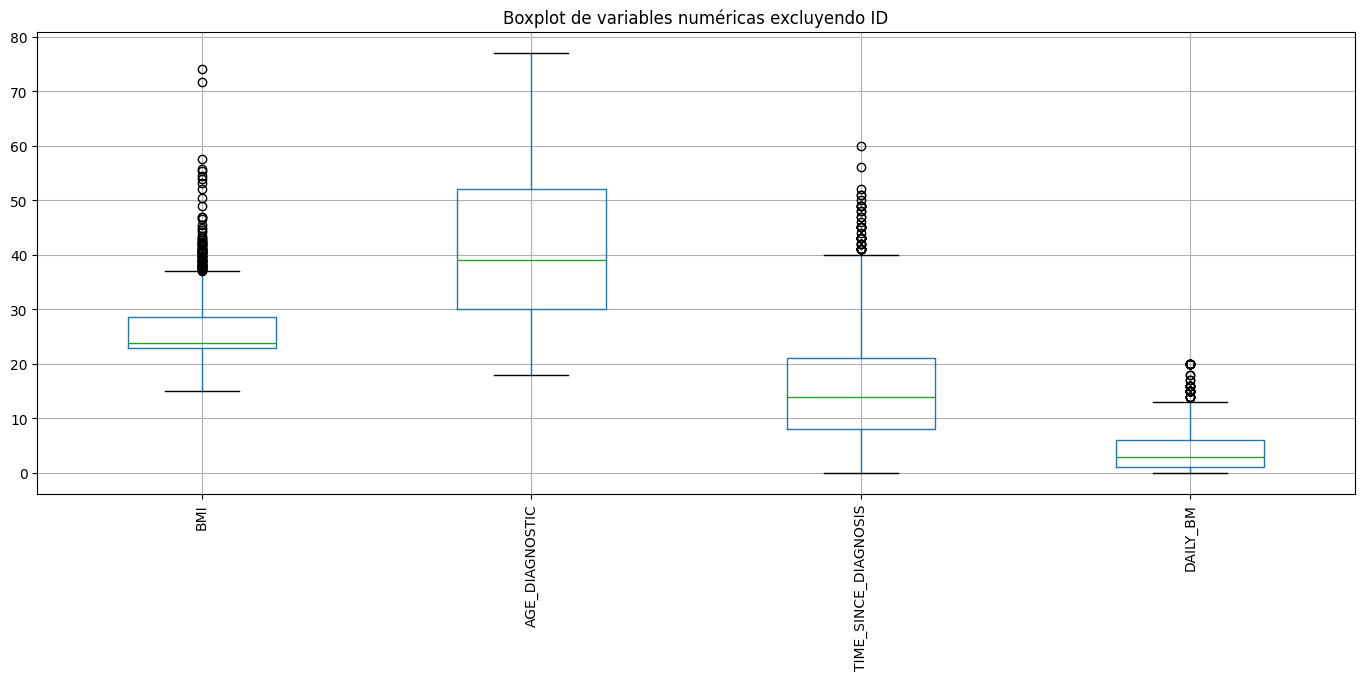

In [335]:
#Pasar a numericas menos id

cols_to_convert = plexus_numeric.columns.difference(['RAW_DATA_FILE_NAME'])  # o 'eid', según el caso

for col in cols_to_convert:
    plexus_numeric[col] = pd.to_numeric(plexus_numeric[col], errors='coerce')



# Seleccionar todas las columnas excepto 'eid'
cols_to_plot = plexus_numeric.drop(columns=['RAW_DATA_FILE_NAME'])

# Boxplot 
cols_to_plot.boxplot(figsize=(17,6))
plt.title('Boxplot de variables numéricas excluyendo ID')
plt.xticks(rotation=90)
plt.show()

In [336]:
#Eliminar outiliers
def remove_outliers(df, id_col, lower=0.03, upper=0.97, drop_rows=True):
    """
    Elimina outliers del DataFrame basado en percentiles columna por columna.
    
    Parámetros:
        df (pd.DataFrame): El DataFrame original.
        id_col (str): Nombre de la columna categórica que no se debe procesar.
        lower (float): Percentil inferior (por defecto 0.05).
        upper (float): Percentil superior (por defecto 0.95).
        drop_rows (bool): Si True, elimina filas con outliers. 
                          Si False, reemplaza outliers por NaN.
                          
    Retorna:
        pd.DataFrame: DataFrame sin outliers.
    """
    df = df.copy()
    
    # Asegurarse de que id_col esté presente
    if id_col not in df.columns:
        raise ValueError(f"La columna '{id_col}' no está en el DataFrame.")

    # Extraer columna ID
    id_series = df[[id_col]].astype(str)

    
    # Filtrar solo columnas numéricas
    numeric_df = df.select_dtypes(include=[np.number]).copy()
    
    # Calcular percentiles
    q_low = numeric_df.quantile(lower)
    q_high = numeric_df.quantile(upper)
    
    # Crear máscara booleana
    mask = (numeric_df >= q_low) & (numeric_df <= q_high)
    
    if drop_rows:
        filtered_numeric = numeric_df[mask.all(axis=1)]
        id_filtered = id_series.loc[filtered_numeric.index]
        return pd.concat([id_filtered, filtered_numeric], axis=1)
    else:
        clipped_numeric = numeric_df.mask(~mask, np.nan)
        return pd.concat([id_series, clipped_numeric], axis=1)


plexus_numeric_noOutliers=remove_outliers(plexus_numeric,id_col='RAW_DATA_FILE_NAME', lower=0.05, upper=0.95, drop_rows=False)




In [337]:
#Escalar
from sklearn.preprocessing import StandardScaler

def scale_numeric_columns(df, id_col):
    """
    Escala las columnas numéricas del DataFrame, excluyendo la columna id_col.

    Parámetros:
        df (pd.DataFrame): DataFrame a escalar.
        id_col (str): Nombre de la columna de identificación (no se escala).

    Retorna:
        pd.DataFrame: DataFrame con columnas numéricas escaladas y id_col intacta.
    """
    df = df.copy()

    if id_col not in df.columns:
        raise ValueError(f"La columna '{id_col}' no está en el DataFrame.")

    # Separar columna ID
    id_series = df[[id_col]].astype(str)

    # Seleccionar columnas numéricas
    numeric_df = df.drop(columns=[id_col]).select_dtypes(include=[np.number])

    # Escalar
    scaler = StandardScaler()
    scaled_array = scaler.fit_transform(numeric_df)
    scaled_df = pd.DataFrame(scaled_array, columns=numeric_df.columns, index=numeric_df.index)

    # Concatenar columna ID y columnas escaladas
    return pd.concat([id_series, scaled_df], axis=1)

plexus_numeric_scaled=scale_numeric_columns(plexus_numeric_noOutliers, 'RAW_DATA_FILE_NAME')

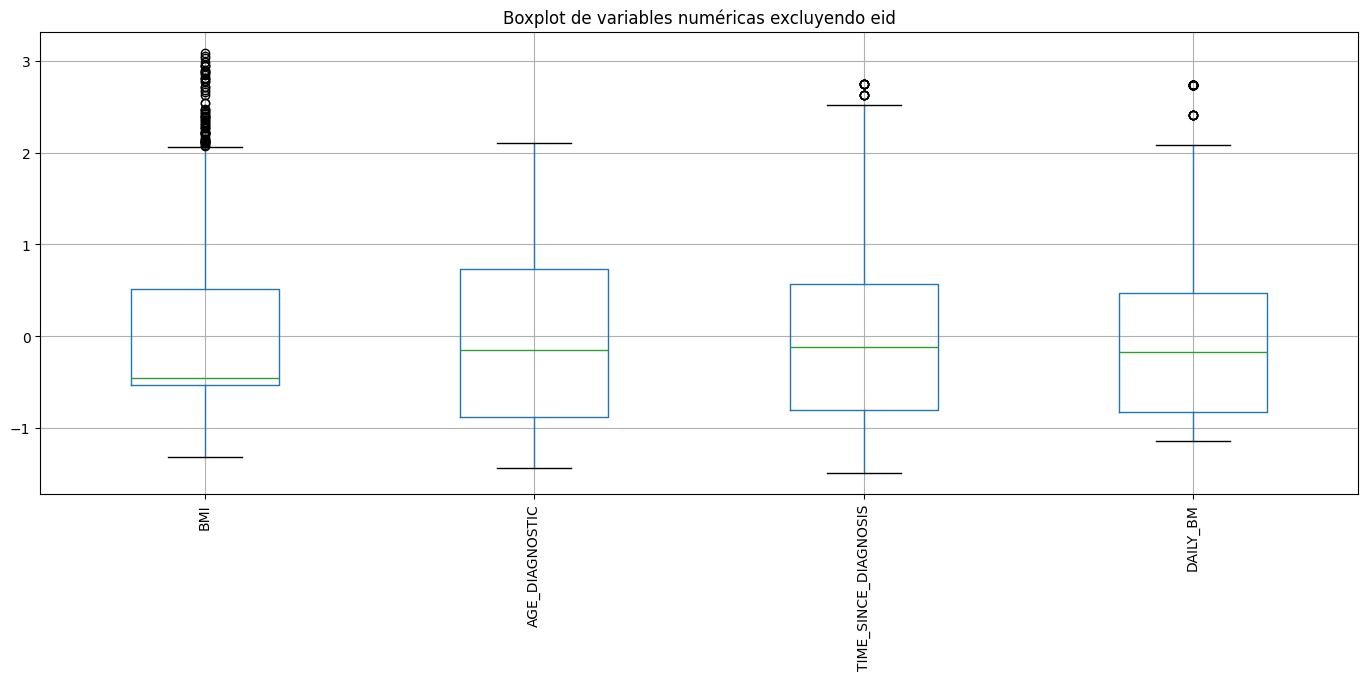

In [338]:
#Visualizar 
# Seleccionar todas las columnas excepto 'eid'
cols_to_plot = plexus_numeric_scaled.drop(columns=['RAW_DATA_FILE_NAME'])

# Boxplot 
cols_to_plot.boxplot(figsize=(17,6))
plt.title('Boxplot de variables numéricas excluyendo eid')
plt.xticks(rotation=90)
plt.show()

In [339]:
plexus_numeric_scaled

,RAW_DATA_FILE_NAME,BMI,AGE_DIAGNOSTIC,TIME_SINCE_DIAGNOSIS,DAILY_BM
1,FR23841213,-0.455148,1.219544,NaN,NaN
2,FR17213021,-0.455148,1.864094,-1.145989,0.469321
3,FR23829990,-0.455148,2.025231,-0.917044,2.731135
7,FR21143001,0.788007,1.783525,2.173711,-1.146260
8,FR20599437,-0.601916,-0.472399,-0.917044,-0.823143
...,...,...,...,...,...
2244,FR24888013,-0.470735,0.816701,0.800042,0.792438
2245,FR27851455,-1.068382,-1.278086,-0.573627,-1.146260
2247,FR24484087,-1.068382,-1.116948,NaN,0.469321
2248,FR21153371,0.344934,1.864094,0.685570,-0.500027


#### Categoricas

In [340]:
plexus_categoric

#quitar stricturoplasty,

,RAW_DATA_FILE_NAME,SEX,DIAGNOSIS,RACE,ETHNICITY,TOBACCO_USE_WITHIN_LAST_7_DAYS,TOBACCO_USE_WITHIN_LAST_3_MONTHS,ORAL_NARCOTIC_INTAKE_WITHIN_LAST_7_DAYS,APHTHOUS_ULCER,ERYTHEMA_NODOSUM,...,NATALIZUMAB,OTHER_BIOLOGIC,SULFASALAZINE,THIOPURINE_UNSPECIFIED,TOFACITINIB,USTEKINUMAB,VEDOLIZUMAB,CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE,FECAL_URGENCY,DISEASE_LOCATION
1,FR23841213,Female,Crohn's Disease,White,"Not Hispanic or Latino; Not Hispanic, Latino/A...",No,No,No,No,No,...,Never,Never,Never,Ever,Never,Never,Ever,No,Severe. sometimes I am unable to make it to th...,Ileocolonic
2,FR17213021,Female,Crohn's Disease,NaN,Not Hispanic or Latino,No,No,No,No,No,...,Never,Never,Never,Never,Never,Never,Never,No,None. I can wait 15 minutes or longer to have ...,Ileocolonic
3,FR23829990,Female,Crohn's Disease,NaN,Not Hispanic or Latino,No,No,No,No,No,...,Never,Never,Never,Never,Never,Never,Ever,No,Moderately severe. I need to get to the bathro...,Ileocolonic
7,FR21143001,Male,Crohn's Disease,White,"Not Hispanic, Latino/A, or Spanish Origin",No,No,No,No,Yes,...,Never,Never,Never,Ever,Never,Never,Ever,No,Moderate. I need to get to the bathroom within...,Ileocolonic
8,FR20599437,Female,Crohn's Disease,White,"Not Hispanic, Latino/A, or Spanish Origin",No,No,No,No,No,...,Never,Never,Ever,Ever,Never,Never,Never,No,Mild. I need to get to the bathroom within 5-1...,Ileocolonic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,FR24888013,Female,Crohn's Disease,White,NON-HISPANIC OR LATINO/A; Not Hispanic or Latino,No,No,No,Yes,Yes,...,Never,Never,Ever,Ever,Never,Ever,Ever,No,Mild. I need to get to the bathroom within 5-1...,Colonic
2245,FR27851455,Male,Crohn's Disease,White,Not Hispanic or Latino,No,No,No,No,No,...,Never,Never,Never,Never,Never,Ever,Ever,No,None. I can wait 15 minutes or longer to have ...,Ileal
2247,FR24484087,Female,Crohn's Disease,White,Not Hispanic or Latino,Yes,No,No,No,No,...,Never,Never,Never,Never,Never,Never,Never,Yes,Moderate. I need to get to the bathroom within...,Ileal
2248,FR21153371,Male,Crohn's Disease,White,Not Hispanic or Latino,No,No,No,No,No,...,Never,Never,Never,Never,Never,Ever,Never,No,Mild. I need to get to the bathroom within 5-1...,Ileocolonic


##### Categoricas Nominales

In [341]:
# Columnas a excluir para crear dummies
exclude_cols = ['RAW_DATA_FILE_NAME','DISEASE_LOCATION',"DIAGNOSIS"]

# Filtrar las columnas nominales para crear dummies (excluir las de la lista)
cols_to_dummify = [col for col in plexus_categoric if col not in exclude_cols]

# Inicializar DataFrame vacío con el mismo índice
plexus_dummies = pd.DataFrame(index=plexus_categoric.index)

# Crear dummies solo para las columnas filtradas
for col in cols_to_dummify:
    serie_filtrada = plexus_categoric[col].replace(
        {"Prefer not to answer": np.nan, "Do not know": np.nan}
    )
    dummies = pd.get_dummies(serie_filtrada, prefix=col, dummy_na=False)
    plexus_dummies = pd.concat([plexus_dummies, dummies], axis=1)

# Finalmente, añadir las columnas excluidas al DataFrame final
plexus_dummies['DIAGNOSIS'] = plexus_categoric['DIAGNOSIS']
plexus_dummies['RAW_DATA_FILE_NAME'] = plexus_categoric['RAW_DATA_FILE_NAME']
plexus_dummies['DISEASE_LOCATION'] = plexus_categoric['DISEASE_LOCATION']

plexus_dummies

,SEX_Female,SEX_Male,RACE_American Indian or Alaska Native,RACE_Asian,"RACE_Asian (East Asian, South Asian, Southeast Asian); Korean","RACE_Asian; Asian (East Asian, South Asian, Southeast Asian)",RACE_Black or African American,RACE_Black or African American;White; White,RACE_Black/African American,RACE_Other,...,CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE_Yes,FECAL_URGENCY_Mild. I need to get to the bathroom within 5-15 minutes,FECAL_URGENCY_Moderate. I need to get to the bathroom within 2-5 minutes,FECAL_URGENCY_Moderately severe. I need to get to the bathroom in less than 2 minutes,FECAL_URGENCY_None. I can wait 15 minutes or longer to have bowel movement,"FECAL_URGENCY_Not applicable, I have an ostomy",FECAL_URGENCY_Severe. sometimes I am unable to make it to the bathroom in time,DIAGNOSIS,RAW_DATA_FILE_NAME,DISEASE_LOCATION
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,Crohn's Disease,FR23841213,Ileocolonic
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,Crohn's Disease,FR17213021,Ileocolonic
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,Crohn's Disease,FR23829990,Ileocolonic
7,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,Crohn's Disease,FR21143001,Ileocolonic
8,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,Crohn's Disease,FR20599437,Ileocolonic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,Crohn's Disease,FR24888013,Colonic
2245,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,Crohn's Disease,FR27851455,Ileal
2247,True,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,Crohn's Disease,FR24484087,Ileal
2248,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,Crohn's Disease,FR21153371,Ileocolonic


In [342]:
# Ordenar las columnas de phenotypes_df, Disease de segunda columna
plexus_dummies= plexus_dummies[['RAW_DATA_FILE_NAME', 'DIAGNOSIS','DISEASE_LOCATION'] + [col for col in plexus_dummies.columns if col not in ['RAW_DATA_FILE_NAME', 'DIAGNOSIS','DISEASE_LOCATION']]]
plexus_dummies

,RAW_DATA_FILE_NAME,DIAGNOSIS,DISEASE_LOCATION,SEX_Female,SEX_Male,RACE_American Indian or Alaska Native,RACE_Asian,"RACE_Asian (East Asian, South Asian, Southeast Asian); Korean","RACE_Asian; Asian (East Asian, South Asian, Southeast Asian)",RACE_Black or African American,...,VEDOLIZUMAB_Ever,VEDOLIZUMAB_Never,CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE_No,CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE_Yes,FECAL_URGENCY_Mild. I need to get to the bathroom within 5-15 minutes,FECAL_URGENCY_Moderate. I need to get to the bathroom within 2-5 minutes,FECAL_URGENCY_Moderately severe. I need to get to the bathroom in less than 2 minutes,FECAL_URGENCY_None. I can wait 15 minutes or longer to have bowel movement,"FECAL_URGENCY_Not applicable, I have an ostomy",FECAL_URGENCY_Severe. sometimes I am unable to make it to the bathroom in time
1,FR23841213,Crohn's Disease,Ileocolonic,True,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
2,FR17213021,Crohn's Disease,Ileocolonic,True,False,False,False,False,False,False,...,False,True,True,False,False,False,False,True,False,False
3,FR23829990,Crohn's Disease,Ileocolonic,True,False,False,False,False,False,False,...,True,False,True,False,False,False,True,False,False,False
7,FR21143001,Crohn's Disease,Ileocolonic,False,True,False,False,False,False,False,...,True,False,True,False,False,True,False,False,False,False
8,FR20599437,Crohn's Disease,Ileocolonic,True,False,False,False,False,False,False,...,False,True,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,FR24888013,Crohn's Disease,Colonic,True,False,False,False,False,False,False,...,True,False,True,False,True,False,False,False,False,False
2245,FR27851455,Crohn's Disease,Ileal,False,True,False,False,False,False,False,...,True,False,True,False,False,False,False,True,False,False
2247,FR24484087,Crohn's Disease,Ileal,True,False,False,False,False,False,False,...,False,True,False,True,False,True,False,False,False,False
2248,FR21153371,Crohn's Disease,Ileocolonic,False,True,False,False,False,False,False,...,False,True,True,False,True,False,False,False,False,False


## Dataset Assembly

merge
pheno_numeric_standard + pheno_dummies + pheno_ordinal_df


In [343]:
plexus_numeric_scaled

,RAW_DATA_FILE_NAME,BMI,AGE_DIAGNOSTIC,TIME_SINCE_DIAGNOSIS,DAILY_BM
1,FR23841213,-0.455148,1.219544,NaN,NaN
2,FR17213021,-0.455148,1.864094,-1.145989,0.469321
3,FR23829990,-0.455148,2.025231,-0.917044,2.731135
7,FR21143001,0.788007,1.783525,2.173711,-1.146260
8,FR20599437,-0.601916,-0.472399,-0.917044,-0.823143
...,...,...,...,...,...
2244,FR24888013,-0.470735,0.816701,0.800042,0.792438
2245,FR27851455,-1.068382,-1.278086,-0.573627,-1.146260
2247,FR24484087,-1.068382,-1.116948,NaN,0.469321
2248,FR21153371,0.344934,1.864094,0.685570,-0.500027


In [344]:
plexus_dummies

,RAW_DATA_FILE_NAME,DIAGNOSIS,DISEASE_LOCATION,SEX_Female,SEX_Male,RACE_American Indian or Alaska Native,RACE_Asian,"RACE_Asian (East Asian, South Asian, Southeast Asian); Korean","RACE_Asian; Asian (East Asian, South Asian, Southeast Asian)",RACE_Black or African American,...,VEDOLIZUMAB_Ever,VEDOLIZUMAB_Never,CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE_No,CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE_Yes,FECAL_URGENCY_Mild. I need to get to the bathroom within 5-15 minutes,FECAL_URGENCY_Moderate. I need to get to the bathroom within 2-5 minutes,FECAL_URGENCY_Moderately severe. I need to get to the bathroom in less than 2 minutes,FECAL_URGENCY_None. I can wait 15 minutes or longer to have bowel movement,"FECAL_URGENCY_Not applicable, I have an ostomy",FECAL_URGENCY_Severe. sometimes I am unable to make it to the bathroom in time
1,FR23841213,Crohn's Disease,Ileocolonic,True,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
2,FR17213021,Crohn's Disease,Ileocolonic,True,False,False,False,False,False,False,...,False,True,True,False,False,False,False,True,False,False
3,FR23829990,Crohn's Disease,Ileocolonic,True,False,False,False,False,False,False,...,True,False,True,False,False,False,True,False,False,False
7,FR21143001,Crohn's Disease,Ileocolonic,False,True,False,False,False,False,False,...,True,False,True,False,False,True,False,False,False,False
8,FR20599437,Crohn's Disease,Ileocolonic,True,False,False,False,False,False,False,...,False,True,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,FR24888013,Crohn's Disease,Colonic,True,False,False,False,False,False,False,...,True,False,True,False,True,False,False,False,False,False
2245,FR27851455,Crohn's Disease,Ileal,False,True,False,False,False,False,False,...,True,False,True,False,False,False,False,True,False,False
2247,FR24484087,Crohn's Disease,Ileal,True,False,False,False,False,False,False,...,False,True,False,True,False,True,False,False,False,False
2248,FR21153371,Crohn's Disease,Ileocolonic,False,True,False,False,False,False,False,...,False,True,True,False,True,False,False,False,False,False


In [345]:
# Primer merge entre pheno_numeric_standard y pheno_dummies
df_final = pd.merge(plexus_numeric_scaled, plexus_dummies, on='RAW_DATA_FILE_NAME', how='inner')

#ordenar 
# Ordenar las columnas de phenotypes_df, Disease de segunda columna
df_final = df_final[['RAW_DATA_FILE_NAME', 'DIAGNOSIS','DISEASE_LOCATION'] + [col for col in df_final.columns if col not in ['RAW_DATA_FILE_NAME', 'DIAGNOSIS','DISEASE_LOCATION']]]

# Si prefieres que 'eid' sea el índice
df_final = df_final.set_index('RAW_DATA_FILE_NAME')

#Eliminar columna DIAGNOSIS
df_final = df_final.drop('DIAGNOSIS', axis=1)

df_final


,DISEASE_LOCATION,BMI,AGE_DIAGNOSTIC,TIME_SINCE_DIAGNOSIS,DAILY_BM,SEX_Female,SEX_Male,RACE_American Indian or Alaska Native,RACE_Asian,"RACE_Asian (East Asian, South Asian, Southeast Asian); Korean",...,VEDOLIZUMAB_Ever,VEDOLIZUMAB_Never,CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE_No,CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE_Yes,FECAL_URGENCY_Mild. I need to get to the bathroom within 5-15 minutes,FECAL_URGENCY_Moderate. I need to get to the bathroom within 2-5 minutes,FECAL_URGENCY_Moderately severe. I need to get to the bathroom in less than 2 minutes,FECAL_URGENCY_None. I can wait 15 minutes or longer to have bowel movement,"FECAL_URGENCY_Not applicable, I have an ostomy",FECAL_URGENCY_Severe. sometimes I am unable to make it to the bathroom in time
RAW_DATA_FILE_NAME,,,,,,,,,,,,,,,,,,,,,
FR23841213,Ileocolonic,-0.455148,1.219544,NaN,NaN,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
FR17213021,Ileocolonic,-0.455148,1.864094,-1.145989,0.469321,True,False,False,False,False,...,False,True,True,False,False,False,False,True,False,False
FR23829990,Ileocolonic,-0.455148,2.025231,-0.917044,2.731135,True,False,False,False,False,...,True,False,True,False,False,False,True,False,False,False
FR21143001,Ileocolonic,0.788007,1.783525,2.173711,-1.146260,False,True,False,False,False,...,True,False,True,False,False,True,False,False,False,False
FR20599437,Ileocolonic,-0.601916,-0.472399,-0.917044,-0.823143,True,False,False,False,False,...,False,True,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FR24888013,Colonic,-0.470735,0.816701,0.800042,0.792438,True,False,False,False,False,...,True,False,True,False,True,False,False,False,False,False
FR27851455,Ileal,-1.068382,-1.278086,-0.573627,-1.146260,False,True,False,False,False,...,True,False,True,False,False,False,False,True,False,False
FR24484087,Ileal,-1.068382,-1.116948,NaN,0.469321,True,False,False,False,False,...,False,True,False,True,False,True,False,False,False,False


In [346]:
#imputar por la media segun DISEASE_LOCATION
df_final_imputed = impute(df_final)

In [347]:
df_final_imputed

,DISEASE_LOCATION,BMI,AGE_DIAGNOSTIC,TIME_SINCE_DIAGNOSIS,DAILY_BM,SEX_Female,SEX_Male,RACE_American Indian or Alaska Native,RACE_Asian,"RACE_Asian (East Asian, South Asian, Southeast Asian); Korean",...,VEDOLIZUMAB_Ever,VEDOLIZUMAB_Never,CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE_No,CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE_Yes,FECAL_URGENCY_Mild. I need to get to the bathroom within 5-15 minutes,FECAL_URGENCY_Moderate. I need to get to the bathroom within 2-5 minutes,FECAL_URGENCY_Moderately severe. I need to get to the bathroom in less than 2 minutes,FECAL_URGENCY_None. I can wait 15 minutes or longer to have bowel movement,"FECAL_URGENCY_Not applicable, I have an ostomy",FECAL_URGENCY_Severe. sometimes I am unable to make it to the bathroom in time
RAW_DATA_FILE_NAME,,,,,,,,,,,,,,,,,,,,,
FR23841213,Ileocolonic,-0.455148,1.219544,-0.802572,-1.146260,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
FR17213021,Ileocolonic,-0.455148,1.864094,-1.145989,0.469321,True,False,False,False,False,...,False,True,True,False,False,False,False,True,False,False
FR23829990,Ileocolonic,-0.455148,2.025231,-0.917044,2.731135,True,False,False,False,False,...,True,False,True,False,False,False,True,False,False,False
FR21143001,Ileocolonic,0.788007,1.783525,2.173711,-1.146260,False,True,False,False,False,...,True,False,True,False,False,True,False,False,False,False
FR20599437,Ileocolonic,-0.601916,-0.472399,-0.917044,-0.823143,True,False,False,False,False,...,False,True,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FR24888013,Colonic,-0.470735,0.816701,0.800042,0.792438,True,False,False,False,False,...,True,False,True,False,True,False,False,False,False,False
FR27851455,Ileal,-1.068382,-1.278086,-0.573627,-1.146260,False,True,False,False,False,...,True,False,True,False,False,False,False,True,False,False
FR24484087,Ileal,-1.068382,-1.116948,-0.344682,0.469321,True,False,False,False,False,...,False,True,False,True,False,True,False,False,False,False


In [348]:
#Guardar en memo
df_final_imputed.to_csv(os.path.join(path_outputs, "ONLYCDplexus_inputed_data_ready.csv"))

## Modelado

In [349]:
# Phenotypes
plexus_final= pd.read_csv("/Users/fjosesala/Documents/GitHub/Olink_Plexus/Plexus_UCvsCD/Output/ONLYCDplexus_inputed_data_ready.csv", sep="," , index_col= "RAW_DATA_FILE_NAME")
plexus_final

,DISEASE_LOCATION,BMI,AGE_DIAGNOSTIC,TIME_SINCE_DIAGNOSIS,DAILY_BM,SEX_Female,SEX_Male,RACE_American Indian or Alaska Native,RACE_Asian,"RACE_Asian (East Asian, South Asian, Southeast Asian); Korean",...,VEDOLIZUMAB_Ever,VEDOLIZUMAB_Never,CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE_No,CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE_Yes,FECAL_URGENCY_Mild. I need to get to the bathroom within 5-15 minutes,FECAL_URGENCY_Moderate. I need to get to the bathroom within 2-5 minutes,FECAL_URGENCY_Moderately severe. I need to get to the bathroom in less than 2 minutes,FECAL_URGENCY_None. I can wait 15 minutes or longer to have bowel movement,"FECAL_URGENCY_Not applicable, I have an ostomy",FECAL_URGENCY_Severe. sometimes I am unable to make it to the bathroom in time
RAW_DATA_FILE_NAME,,,,,,,,,,,,,,,,,,,,,
FR23841213,Ileocolonic,-0.455148,1.219544,-0.802572,-1.146260,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
FR17213021,Ileocolonic,-0.455148,1.864094,-1.145989,0.469321,True,False,False,False,False,...,False,True,True,False,False,False,False,True,False,False
FR23829990,Ileocolonic,-0.455148,2.025231,-0.917044,2.731135,True,False,False,False,False,...,True,False,True,False,False,False,True,False,False,False
FR21143001,Ileocolonic,0.788007,1.783525,2.173711,-1.146260,False,True,False,False,False,...,True,False,True,False,False,True,False,False,False,False
FR20599437,Ileocolonic,-0.601916,-0.472399,-0.917044,-0.823143,True,False,False,False,False,...,False,True,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FR24888013,Colonic,-0.470735,0.816701,0.800042,0.792438,True,False,False,False,False,...,True,False,True,False,True,False,False,False,False,False
FR27851455,Ileal,-1.068382,-1.278086,-0.573627,-1.146260,False,True,False,False,False,...,True,False,True,False,False,False,False,True,False,False
FR24484087,Ileal,-1.068382,-1.116948,-0.344682,0.469321,True,False,False,False,False,...,False,True,False,True,False,True,False,False,False,False


In [350]:
plexus_final.dtypes

DISEASE_LOCATION                                                                          object
BMI                                                                                      float64
AGE_DIAGNOSTIC                                                                           float64
TIME_SINCE_DIAGNOSIS                                                                     float64
DAILY_BM                                                                                 float64
                                                                                          ...   
FECAL_URGENCY_Moderate. I need to get to the bathroom within 2-5 minutes                    bool
FECAL_URGENCY_Moderately severe. I need to get to the bathroom in less than 2 minutes       bool
FECAL_URGENCY_None. I can wait 15 minutes or longer to have bowel movement                  bool
FECAL_URGENCY_Not applicable, I have an ostomy                                              bool
FECAL_URGENCY_Severe. sometime

In [351]:
#undersampling


# Separar los datos

Ileal= plexus_final[plexus_final['DISEASE_LOCATION'] == 'Ileal']
Ileocolonic= plexus_final[plexus_final['DISEASE_LOCATION'] == 'Ileocolonic']
Colonic= plexus_final[plexus_final['DISEASE_LOCATION'] == 'Colonic']


# Ver cuántos casos ileal hay
print(f"Casos Ileal: {len(Ileal)}")

# Ver cuántos casos ileocolonic hay
print(f"Casos Ileocolonic: {len(Ileocolonic)}")

# Ver cuántos casos colonic hay
print(f"Casos Colonic: {len(Colonic)}")





Casos Ileal: 277
Casos Ileocolonic: 695
Casos Colonic: 223


In [352]:

# Undersample Ileocolonic para igualar el número de Colonic
Ileocolonic_downsampled = Ileocolonic.sample(n=len(Colonic), random_state=42)

# Undersample Ileal para igualar el número de Colonic
Ileal_downsampled = Ileal.sample(n=len(Colonic), random_state=42)


# Unir ambos subconjuntos
balanced_df = pd.concat([Ileal_downsampled,Ileocolonic_downsampled, Colonic])

# Mezclar aleatoriamente
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Verificación rápida
print(balanced_df['DISEASE_LOCATION'].value_counts())

DISEASE_LOCATION
Ileocolonic    223
Ileal          223
Colonic        223
Name: count, dtype: int64


In [353]:
# Separar X e y
X = balanced_df.drop(columns='DISEASE_LOCATION')
y = balanced_df['DISEASE_LOCATION']

# Dividir en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Lasso

In [ ]:
#Regresion lasso 

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


X = pLEXUS_final.drop('DIAGNOSIS', axis=1)
y = pLEXUS_final['DIAGNOSIS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

ValueError: could not convert string to float: 'Control'

### Random Forest


In [354]:
shap.initjs()

In [355]:
# Entrenar modelo
clf = RandomForestClassifier(n_estimators=1000, random_state=42)
clf.fit(X_train, y_train)

# Predicción
y_pred = clf.predict(X_test)

# Evaluar
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Colonic       0.74      0.71      0.72        75
       Ileal       0.77      0.72      0.74        64
 Ileocolonic       0.55      0.61      0.58        62

    accuracy                           0.68       201
   macro avg       0.68      0.68      0.68       201
weighted avg       0.69      0.68      0.68       201



In [356]:
clf.classes_

array(['Colonic', 'Ileal', 'Ileocolonic'], dtype=object)

In [363]:
importances = clf.feature_importances_

# Crear un DataFrame para verlo mejor
importances_df = pd.DataFrame({'variable': X.columns, 'importancia': importances})

# Ordenar de mayor a menor
importances_df = importances_df.sort_values(by='importancia', ascending=False)
importances_df

,variable,importancia
0,BMI,0.190924
1,AGE_DIAGNOSTIC,0.088715
2,TIME_SINCE_DIAGNOSIS,0.078276
3,DAILY_BM,0.063917
82,FECAL_URGENCY_Mild. I need to get to the bathr...,0.018202
...,...,...
13,RACE_Other,0.000000
11,RACE_Black or African American;White; White,0.000000
18,"ETHNICITY_Hispanic or Latino; Not Hispanic, La...",0.000000
8,"RACE_Asian (East Asian, South Asian, Southeast...",0.000000


In [358]:
#generar un txt de importances_df, ordenadas de mayor a menor
importances_df.to_csv(os.path.join(path_outputs, "ONLYCDplexus_importances.txt"), sep="\t", index=False)



In [359]:
explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)

In [360]:
X_test = X_test.apply(pd.to_numeric, errors='coerce')

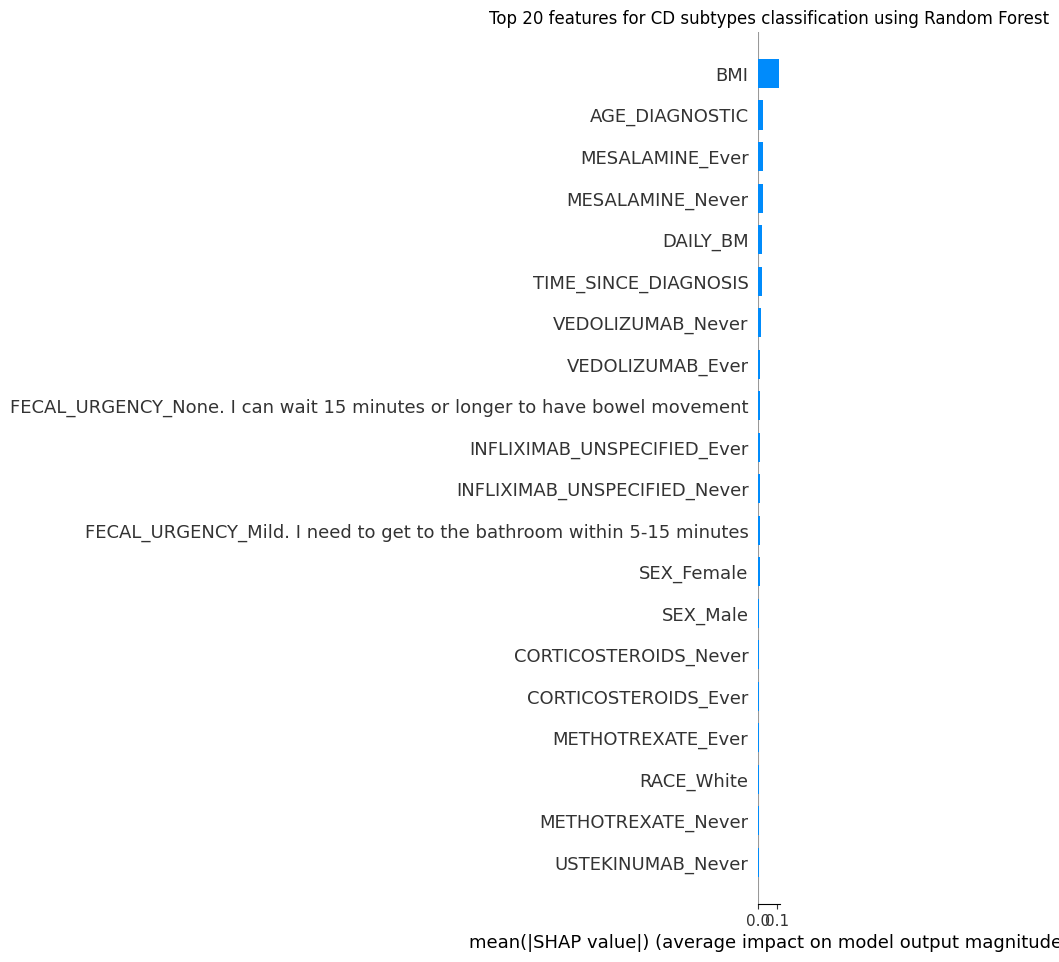

In [361]:
# Crear el plot SHAP (summary bar plot)
shap.summary_plot(shap_values[:,:,1], X_test, show=False, plot_type="bar", max_display=20) #shap_values[:,:,1] → SHAP para Ulcerative Colitis
# Agregar título con matplotlib
plt.title("Top 20 features for CD subtypes classification using Random Forest")
# Mostrar la figura con el título
plt.show()

/Users/fjosesala/Documents/GitHub/Olink_Plexus/.venv/lib/python3.13/site-packages/shap/plots/_beeswarm.py:1153: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


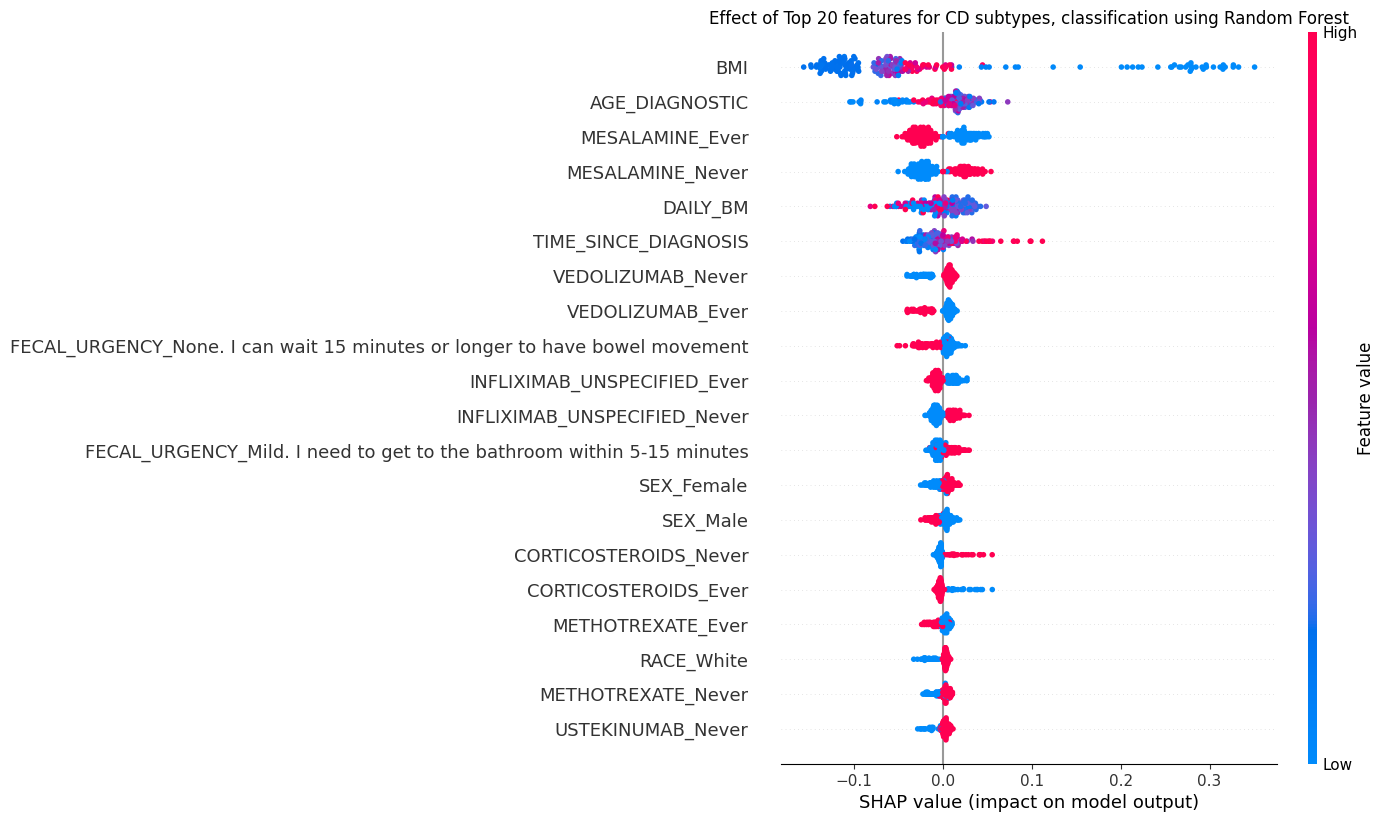

In [364]:
shap.summary_plot(shap_values[:,:,1], X_test, show=False) ##shap_values[:,:,1] → SHAP para Ulcerative Colitis
plt.title("Effect of Top 20 features for CD subtypes, classification using Random Forest")
plt.show()

In [365]:
#importancia de las variables

importances = clf.feature_importances_
importances_df = pd.DataFrame({'variable': X.columns, 'importancia': importances})
importances_df = importances_df.sort_values(by='importancia', ascending=False)
top_varsRF = importances_df

top_varsRF

,variable,importancia
0,BMI,0.190924
1,AGE_DIAGNOSTIC,0.088715
2,TIME_SINCE_DIAGNOSIS,0.078276
3,DAILY_BM,0.063917
82,FECAL_URGENCY_Mild. I need to get to the bathr...,0.018202
...,...,...
13,RACE_Other,0.000000
11,RACE_Black or African American;White; White,0.000000
18,"ETHNICITY_Hispanic or Latino; Not Hispanic, La...",0.000000
8,"RACE_Asian (East Asian, South Asian, Southeast...",0.000000


### XGBoost

In [366]:
#Passar clase a label numerico
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [367]:
#Crear modelo 
XGBmodel = xgb.XGBClassifier(objective='binary:logistic', random_state=42, n_stimators=1000)
XGBmodel.fit(X_train, y_train)

/Users/fjosesala/Documents/GitHub/Olink_Plexus/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [16:13:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_stimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, n_stimators=1000, ...)

In [368]:
# Realizamos predicciones en el conjunto de prueba
y_pred = XGBmodel.predict(X_test)

# Evaluamos el modelo
accuracy = XGBmodel.score(X_test, y_test)
print('Precisión:', accuracy)


Precisión: 0.7114427860696517


/Users/fjosesala/Documents/GitHub/Olink_Plexus/.venv/lib/python3.13/site-packages/shap/plots/_beeswarm.py:1153: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


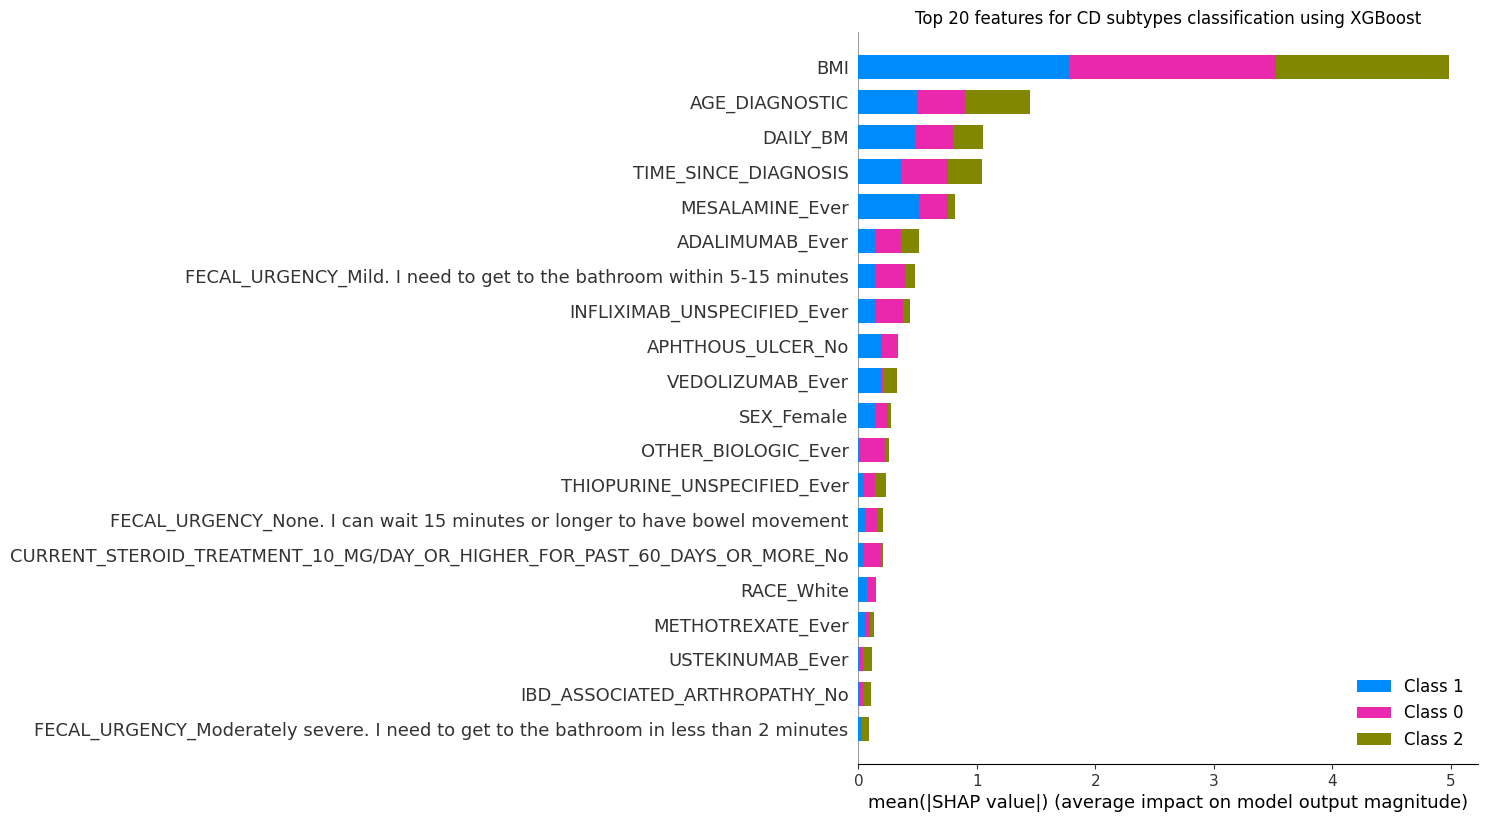

In [369]:
X_test = X_test.apply(pd.to_numeric, errors='coerce')
explainer2 = shap.Explainer(XGBmodel)
shap_values2 = explainer2(X_test)
# Crear el plot SHAP (summary bar plot)
shap.summary_plot(shap_values2, X_test, plot_type="bar", max_display=20, show=False)
# Agregar título con matplotlib
plt.title("Top 20 features for CD subtypes classification using XGBoost")
# Mostrar la figura con el título
plt.show()

In [370]:
# Force plot para clase 2 en una observación
# Force plot para clase 2 en la primera observación
shap.force_plot(shap_values2[0, :, 2])



/Users/fjosesala/Documents/GitHub/Olink_Plexus/.venv/lib/python3.13/site-packages/shap/plots/_beeswarm.py:1153: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


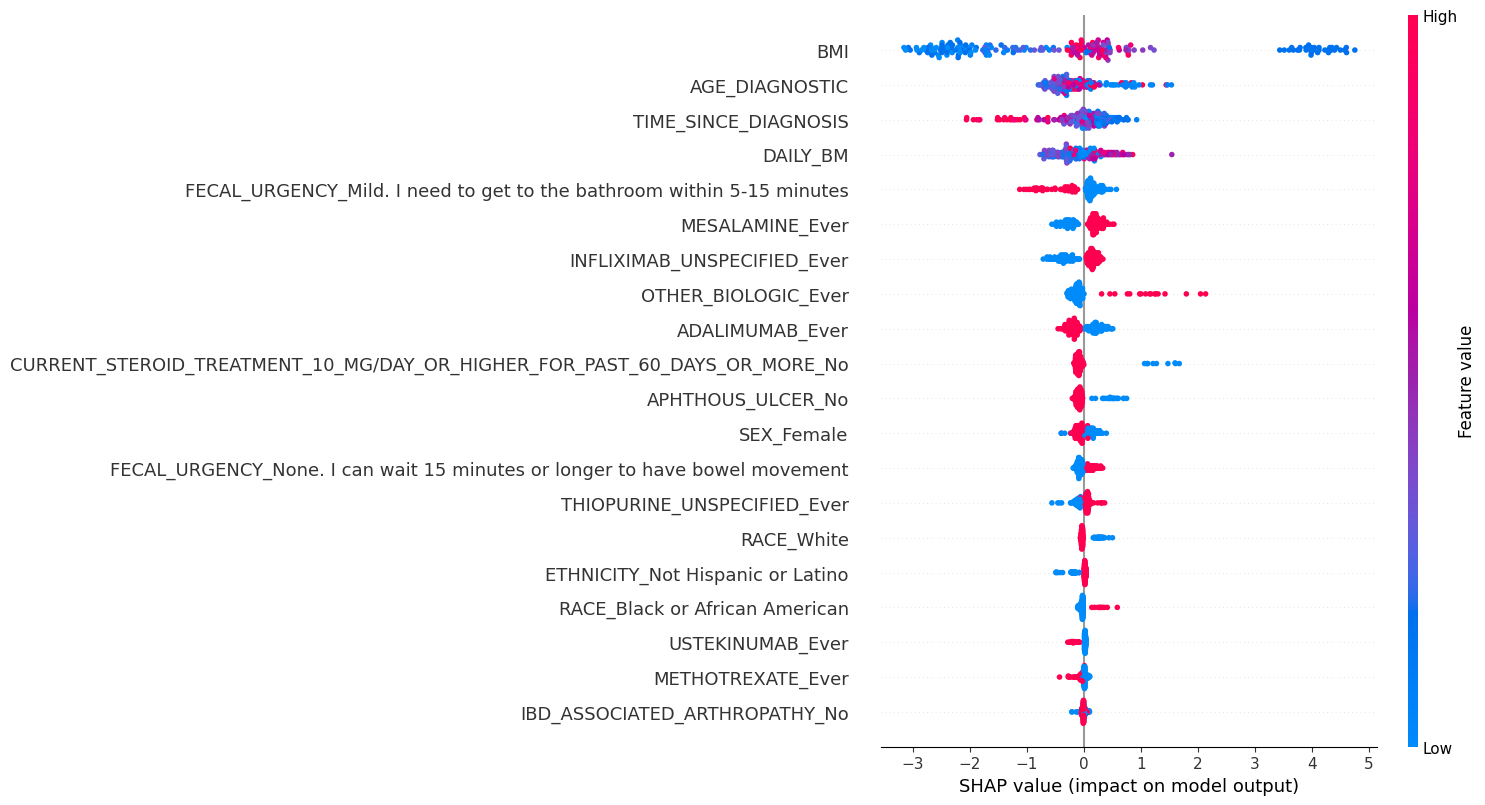

In [373]:
shap.summary_plot(shap_values2[..., 0], X_test, plot_type="dot", max_display=20)


In [161]:
#Prob de tener ibd. valores rojos a la izq reducen la prob de tener ibd
# Crear el plot SHAP (summary bar plot)
shap.summary_plot(shap_values2, X_test, plot_type="dot", max_display=20, show=False)
# Agregar título con matplotlib
plt.title("Effect of Top 20 features for UC classification using XGBoost")
# Mostrar la figura con el título
plt.show()

AssertionError: Only plot_type = 'bar' is supported for multi-output explanations!

In [ ]:
"""Comparar los SHAP de clase UC vs CD directamente (por ejemplo, usando multiclass SHAP si estás clasificando entre UC/CD/None).

Hacer análisis de importancia cruzada: ¿cuáles variables discriminan bien UC pero no CD, y viceversa?

Generar perfiles clínicos simulados con valores extremos de SHAP para cada clase y discutirlos.
"""


In [162]:
# Obtener la importancia de cada variable del modelo XGBoost MEDIANTE SHAP - MAS CONFIABLE

# Calcular la media del valor absoluto de SHAP por variable
shap_importance = np.abs(shap_values2.values).mean(axis=0)

# Crear un DataFrame con nombres de variables
shap_df = pd.DataFrame({
    'feature': X_test.columns,
    'mean_abs_shap': shap_importance
})

# Ordenar por importancia
shap_df = shap_df.sort_values(by='mean_abs_shap', ascending=False)

# Ver top 20 variables más importantes
top_varsXGB = shap_df
print(top_varsXGB)

ValueError: Per-column arrays must each be 1-dimensional

### ARM

## Validacion


In [ ]:
#FS para vertientes de CD
variables=[
    "RAW_DATA_FILE_NAME",
    "DISEASE_LOCATION",
]

covariables=[
    "RIGHT_COLONIC_PHENOTYPE",
    "LEFT_COLONIC_PHENOTYPE",
    "RECTAL_PHENOTYPE",
    "ILEAL_PHENOTYPE",
    "TRANSVERSE_COLONIC_PHENOTYPE",
    "BMI"
]

VARS_TO_TRAIN = variables + covariables

Limpar para Logistic

In [180]:
#Limpiar para Logistic Regression
#Charge the dataframes

# Plexus Metadata
ONLYCD_plexus_clean_metadata = pd.read_csv("/Users/fjosesala/Documents/GitHub/Olink_Plexus/Plexus_UCvsCD/Output/ONLYCD_plexus_clean_data.csv")
ONLYCD_plexus_clean_metadata

,Unnamed: 0,RAW_DATA_FILE_NAME,SEX,DIAGNOSIS,RACE,ETHNICITY,CROHNS_DISEASE_PHENOTYPE,PHENOTYPE_ANAL_STRICTURE,PHENOTYPE_ILEAL_STRICTURE,PHENOTYPE_JEJUNAL_STRICTURE,...,TOFACITINIB,USTEKINUMAB,VEDOLIZUMAB,CURRENT_STEROID_TREATMENT_10_MG/DAY_OR_HIGHER_FOR_PAST_60_DAYS_OR_MORE,FECAL_URGENCY,DAILY_BM,BMI,DISEASE_LOCATION,AGE_DIAGNOSTIC,TIME_SINCE_DIAGNOSIS
0,1,FR23841213,Female,Crohn's Disease,White,"Not Hispanic or Latino; Not Hispanic, Latino/A...",Both stricturing and penetrating (B2B3),NaN,Yes,No,...,Never,Never,Ever,No,Severe. sometimes I am unable to make it to th...,14.0,NaN,Ileocolonic,56,46.0
1,2,FR17213021,Female,Crohn's Disease,NaN,NaN,Stricturing (B2),No,Yes,No,...,Never,Never,Never,No,None. I can wait 15 minutes or longer to have ...,5.0,NaN,Ileocolonic,64,5.0
2,3,FR23829990,Female,Crohn's Disease,NaN,NaN,Stricturing (B2),No,Yes,No,...,Never,Never,Ever,No,Moderately severe. I need to get to the bathro...,12.0,NaN,Ileocolonic,66,7.0
3,7,FR21143001,Male,Crohn's Disease,White,"Not Hispanic, Latino/A, or Spanish Origin",Penetrating (B3),No,Yes,No,...,Never,Never,Ever,No,Moderate. I need to get to the bathroom within...,0.0,29.025056,Ileocolonic,63,34.0
4,8,FR20599437,Female,Crohn's Disease,White,"Not Hispanic, Latino/A, or Spanish Origin","Inflammatory non-penetrating, non-stricturing ...",No,No,No,...,Never,Never,Never,No,NaN,1.0,23.117073,Ileocolonic,35,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,2244,FR24888013,Female,Crohn's Disease,White,NON-HISPANIC OR LATINO/A; Not Hispanic or Latino,"Inflammatory non-penetrating, non-stricturing ...",No,No,No,...,Never,Ever,Ever,No,Mild. I need to get to the bathroom within 5-1...,6.0,NaN,Colonic,51,22.0
1191,2245,FR27851455,Male,Crohn's Disease,White,Not Hispanic or Latino,Stricturing (B2),No,Yes,No,...,Never,Ever,Ever,No,None. I can wait 15 minutes or longer to have ...,0.0,NaN,Ileal,25,10.0
1192,2247,FR24484087,Female,Crohn's Disease,White,Not Hispanic or Latino,"Inflammatory non-penetrating, non-stricturing ...",No,No,No,...,Never,Never,Never,Yes,Moderate. I need to get to the bathroom within...,5.0,NaN,Ileal,27,1.0
1193,2248,FR21153371,Male,Crohn's Disease,White,Not Hispanic or Latino,Stricturing (B2),No,Yes,No,...,Never,Ever,Never,No,Mild. I need to get to the bathroom within 5-1...,2.0,27.141737,Ileocolonic,64,21.0


In [181]:
#Dejar solo las columnas con los nombres en VARS_TO_TRAIN

ONLYCD_plexus_clean_metadata = ONLYCD_plexus_clean_metadata[VARS_TO_TRAIN]
ONLYCD_plexus_clean_metadata


,RAW_DATA_FILE_NAME,AGE_DIAGNOSTIC,DISEASE_LOCATION,RIGHT_COLONIC_PHENOTYPE,LEFT_COLONIC_PHENOTYPE,RECTAL_PHENOTYPE,ILEAL_PHENOTYPE,TRANSVERSE_COLONIC_PHENOTYPE,BMI
0,FR23841213,56,Ileocolonic,Yes,Yes,Yes,Yes,Yes,NaN
1,FR17213021,64,Ileocolonic,Yes,Yes,No,Yes,Yes,NaN
2,FR23829990,66,Ileocolonic,Yes,Yes,No,Yes,Yes,NaN
3,FR21143001,63,Ileocolonic,Yes,Yes,Yes,Yes,Yes,29.025056
4,FR20599437,35,Ileocolonic,Yes,Yes,No,Yes,Yes,23.117073
...,...,...,...,...,...,...,...,...,...
1190,FR24888013,51,Colonic,Yes,Yes,Yes,No,Yes,NaN
1191,FR27851455,25,Ileal,No,No,No,Yes,No,NaN
1192,FR24484087,27,Ileal,No,No,No,Yes,No,NaN
1193,FR21153371,64,Ileocolonic,Yes,No,No,Yes,No,27.141737


In [190]:
#Guardarla en memo
ONLYCD_plexus_clean_metadata.to_csv(os.path.join(path_outputs, "ONLYCD_plexus_clean_metadata.csv"))

Crear Tabla: Ileal vs Colonic

In [184]:
#Quitar las filas que digan Ileocolonic de la columna Disease_Location
ONLYCD_plexus_IlealvsColonic = ONLYCD_plexus_clean_metadata[ONLYCD_plexus_clean_metadata['DISEASE_LOCATION'] != 'Ileocolonic']

In [185]:
#Guardarla en memo
ONLYCD_plexus_IlealvsColonic.to_csv(os.path.join(path_outputs, "ONLYCD_plexus_IlealvsColonic.csv"))

Crear Tabla: Ileal vs IleoColonic

In [186]:
ONLYCD_plexus_IlealvsIleoColonic = ONLYCD_plexus_clean_metadata[ONLYCD_plexus_clean_metadata['DISEASE_LOCATION'] != 'Colonic']

In [188]:
#Guardarla en memo
ONLYCD_plexus_IlealvsIleoColonic.to_csv(os.path.join(path_outputs, "ONLYCD_plexus_IlealvsIleoColonic.csv"))

Crear Tabla: Colonic vs IleoColonic

In [187]:
ONLYCD_plexus_ColonicvsIleoColonic = ONLYCD_plexus_clean_metadata[ONLYCD_plexus_clean_metadata['DISEASE_LOCATION'] != 'Ileal']

In [189]:
#Guardarla en memo
ONLYCD_plexus_ColonicvsIleoColonic.to_csv(os.path.join(path_outputs, "ONLYCD_plexus_ColonicvsIleoColonic.csv"))